In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse 
from statsmodels.compat import lzip
from statsmodels.formula.api import ols


from scipy.stats import shapiro
from scipy import stats




In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.4f}'.format

## Reading the Data

In [4]:
df_house = pd.read_csv('data/houseprice.csv')
df_house.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1458  1459          20       RL      68.0000     9717   Pave   NaN      Reg   
1367  1368         160       RM      41.0000     2665   Pave   NaN      Reg   
394    395          50       RL      60.0000    10134   Pave   NaN      Reg   
1412  1413          90       RL      60.0000     7200   Pave   NaN      Reg   
176    177          60       RL      97.0000    10029   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1367         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
394          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1412         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
176          Lvl    AllPub    Corner       Gtl      ClearCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1458       Norm     1Fam     1Story            5            6       1950   
1367       Norm   TwnhsE     2Story            5            6       1977   
394        Norm     1Fam     1.5Fin            5            6       1940   
1412       Norm   Duplex     1Story            4            5       1949   
176        Norm     1Fam     2Story            6            5       1988   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1367          1977     Gable  CompShg     CemntBd     CmentBd       None   
394           1950     Gable  CompShg     MetalSd     MetalSd       None   
1412          1950     Gable  CompShg     BrkFace       Stone       None   
176           1989     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1458      0.0000        TA        TA     CBlock       TA       TA   
1367      0.0000        TA        TA      PConc       TA       TA   
394       0.0000        TA        TA     CBlock       TA       TA   
1412      0.0000        TA        TA       Slab      NaN      NaN   
176     268.0000        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1458           Mn          GLQ          49          Rec        1029   
1367           No          ALQ         548          Rec         173   
394            No          Unf           0          Unf           0   
1412          NaN          NaN           0          NaN           0   
176            No          GLQ         831          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1458          0         1078    GasA        Gd          Y      FuseA   
1367         36          757    GasA        Ex          Y      SBrkr   
394         735          735    GasA        Gd          Y      FuseA   
1412          0            0    Wall        Fa          N      FuseF   
176         320         1151    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1458      1078         0             0       1078             1             0   
1367       925       550             0       1475             0             0   
394        735       299             0       1034             0             0   
1412      1040         0             0       1040             0             0   
176       1164       896             0       2060             0             1   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1458         1         0             2             1          Gd   
1367         2         0             4             1          TA   
394          1         0             2             1          TA   
1412         2         0             2             2          TA   
176          2         1             4             1          TA   

   

In [5]:
df_house.set_index('Id', inplace=True)
df_house.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
575           80       RL      70.0000    10500   Pave   NaN      Reg   
293           50       RL      60.0000    11409   Pave   NaN      Reg   
494           20       RL      70.0000     7931   Pave   NaN      Reg   
854           80       RL          NaN    12095   Pave   NaN      IR1   
1387          60       RL      80.0000    16692   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
575          Lvl    AllPub       FR2       Gtl        NAmes       Norm   
293          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
494          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
854          Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1387         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
575        Norm     1Fam       SLvl            5            7       1971   
293        Norm     1Fam     1.5Fin            5            4       1949   
494        Norm     1Fam     1Story            5            6       1960   
854        Norm     1Fam       SLvl            6            6       1964   
1387       Norm     1Fam     2Story            7            5       1978   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
575           2005   Gambrel  CompShg     MetalSd     AsphShn    BrkFace   
293           2008     Gable  CompShg     Wd Sdng     Wd Sdng       None   
494           1960     Gable  CompShg     BrkFace     Wd Sdng       None   
854           1964     Gable  CompShg     MetalSd     HdBoard    BrkFace   
1387          1978     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
575      82.0000        TA        TA     CBlock       TA       TA   
293       0.0000        TA        TA     CBlock       TA       TA   
494       0.0000        TA        TA     CBlock       TA       TA   
854     115.0000        TA        Gd     CBlock       TA       TA   
1387    184.0000        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
575            Av          ALQ         349          Unf           0   
293            No          LwQ         292          Unf           0   
494            No          BLQ         374          LwQ         532   
854            Gd          Rec         564          Unf           0   
1387           No          BLQ         790          LwQ         469   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
575          23          372    GasA        TA          Y      SBrkr   
293         476          768    GasA        Gd          Y      SBrkr   
494         363         1269    GasA        TA          Y      FuseA   
854         563         1127    GasA        TA          Y      SBrkr   
1387        133         1392    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
575        576       533             0       1109             0             1   
293       1148       568             0       1716             0             0   
494       1269         0             0       1269             0             0   
854       1445   

## Analyzing the data

In [6]:
df_house.shape

(1460, 80)

In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
# This year data types are incorrect in the data
# Option 1 to do this but since we have only year this might not be good appraoch
# for col in ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']:
#     df_house[col] = df_house[col].astype('datetime64[ns]')

# Option 2 use to_date(dt, format)

for col in ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']:
    df_house[col] = pd.to_datetime(df_house[col], format='%Y')
    

In [9]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSSubClass     1460 non-null   int64         
 1   MSZoning       1460 non-null   object        
 2   LotFrontage    1201 non-null   float64       
 3   LotArea        1460 non-null   int64         
 4   Street         1460 non-null   object        
 5   Alley          91 non-null     object        
 6   LotShape       1460 non-null   object        
 7   LandContour    1460 non-null   object        
 8   Utilities      1460 non-null   object        
 9   LotConfig      1460 non-null   object        
 10  LandSlope      1460 non-null   object        
 11  Neighborhood   1460 non-null   object        
 12  Condition1     1460 non-null   object        
 13  Condition2     1460 non-null   object        
 14  BldgType       1460 non-null   object        
 15  HouseStyle     1460 n

In [10]:
df_house.loc[:, ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']]

YearBuilt YearRemodAdd     YrSold GarageYrBlt
Id                                                 
1    2003-01-01   2003-01-01 2008-01-01  2003-01-01
2    1976-01-01   1976-01-01 2007-01-01  1976-01-01
3    2001-01-01   2002-01-01 2008-01-01  2001-01-01
4    1915-01-01   1970-01-01 2006-01-01  1998-01-01
5    2000-01-01   2000-01-01 2008-01-01  2000-01-01
6    1993-01-01   1995-01-01 2009-01-01  1993-01-01
7    2004-01-01   2005-01-01 2007-01-01  2004-01-01
8    1973-01-01   1973-01-01 2009-01-01  1973-01-01
9    1931-01-01   1950-01-01 2008-01-01  1931-01-01
10   1939-01-01   1950-01-01 2008-01-01  1939-01-01
11   1965-01-01   1965-01-01 2008-01-01  1965-01-01
12   2005-01-01   2006-01-01 2006-01-01  2005-01-01
13   1962-01-01   1962-01-01 2008-01-01  1962-01-01
14   2006-01-01   2007-01-01 2007-01-01  2006-01-01
15   1960-01-01   1960-01-01 2008-01-01  1960-01-01
16   1929-01-01   2001-01-01 2007-01-01  1991-01-01
17   1970-01-01   1970-01-01 2010-01-01  1970-01-01
18   1967-01-01   1967-01-01 2006-01-01  1967-01-01
19   2004-01-01   2004-01-01 2008-01-01  2004-01-01
20   1958-01-01   1965-01-01 2009-01-01  1958-01-01
21   2005-01-01   2006-01-01 2006-01-01  2005-01-01
22   1930-01-01   1950-01-01 2007-01-01  1930-01-01
23   2002-01-01   2002-01-01 2008-01-01  2002-01-01
24   1976-01-01   1976-01-01 2007-01-01  1976-01-01
25   1968-01-01   2001-01-01 2010-01-01  1968-01-01
26   2007-01-01   2007-01-01 2009-01-01  2007-01-01
27   1951-01-01   2000-01-01 2010-01-01  2005-01-01
28   2007-01-01   2008-01-01 2010-01-01  2008-01-01
29   1957-01-01   1997-01-01 2006-01-01  1957-01-01
30   1927-01-01   1950-01-01 2008-01-01  1920-01-01
31   1920-01-01   1950-01-01 2008-01-01  1920-01-01
32   1966-01-01   2006-01-01 2008-01-01  1966-01-01
33   2007-01-01   2007-01-01 2008-01-01  2007-01-01
34   1959-01-01   1959-01-01 2010-01-01  1959-01-01
35   2005-01-01   2005-01-01 2007-01-01  2005-01-01
36   2004-01-01   2005-01-01 2006-01-01  2004-01-01
37   1994-01-01   1995-01-01 2009-01-01  1995-01-01
38   1954-01-01   1990-01-01 2009-01-01  1954-01-01
39   1953-01-01   2007-01-01 2010-01-01  1953-01-01
40   1955-01-01   1955-01-01 2008-01-01         NaT
41   1965-01-01   1965-01-01 2006-01-01  1965-01-01
42   1959-01-01   1959-01-01 2007-01-01  1959-01-01
43   1983-01-01   1983-01-01 2007-01-01  1983-01-01
44   1975-01-01   1980-01-01 2008-01-01  1977-01-01
45   1959-01-01   1959-01-01 2006-01-01  1959-01-01
46   2005-01-01   2005-01-01 2010-01-01  2005-01-01
47   2003-01-01   2003-01-01 2009-01-01  2003-01-01
48   2006-01-01   2006-01-01 2007-01-01  2006-01-01
49   1920-01-01   2008-01-01 2009-01-01         NaT
50   1966-01-01   1966-01-01 2007-01-01  1966-01-01
51   1997-01-01   1997-01-01 2007-01-01  1997-01-01
52   1934-01-01   1950-01-01 2006-01-01  1985-01-01
53   1963-01-01   1963-01-01 2010-01-01  1963-01-01
54   1981-01-01   1987-01-01 2006-01-01  1981-01-01
55   1955-01-01   1955-01-01 2007-01-01  1962-01-01
56   1964-01-01   1964-01-01 2008-01-01  1964-01-01
57   1999-01-01   2000-01-01 2009-01-01  1999-01-01
58   2004-01-01   2004-01-01 2006-01-01  2004-01-01
59   2006-01-01   2006-01-01 2006-01-01  2006-01-01
60   1972-01-01   1972-01-01 2008-01-01  1973-01-01
61   2004-01-01   2004-01-01 2006-01-01  2006-01-01
62   1920-01-01   1996-01-01 2007-01-01  1935-01-01
63   2006-01-01   2006-01-01 2007-01-01  2006-01-01
64   1921-01-01   1950-01-01 2010-01-01  1990-01-01
65   1997-01-01   1998-01-01 2009-01-01  1998-01-01
66   2004-01-01   2005-01-01 2007-01-01  2004-01-01
67   1970-01-01   1989-01-01 2010-01-01  1970-01-01
68   2003-01-01   2003-01-01 2007-01-01  2003-01-01
69   1945-01-01   1950-01-01 2010-01-01  1945-01-01
70   1953-01-01   1953-01-01 2006-01-01  1953-01-01
71   1973-01-01   1973-01-01 2007-01-01  1973-01-01
72   1982-01-01   2006-01-01 2007-01-01  1987-01-01
73   1998-01-01   1998-01-01 2009-01-01  1998-01-01
74   1954-01-01   2003-01-01 2010-01-01  1989-01-01
75   1915-01-01   1950-01-01 2010-01-01  1915-01-01
76

In [11]:
# Coverting Numerical columns into Categorical using .astype()
for col in ['MSSubClass','OverallQual','OverallCond']:
    df_house[col] = df_house[col].astype('object')

In [12]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSSubClass     1460 non-null   object        
 1   MSZoning       1460 non-null   object        
 2   LotFrontage    1201 non-null   float64       
 3   LotArea        1460 non-null   int64         
 4   Street         1460 non-null   object        
 5   Alley          91 non-null     object        
 6   LotShape       1460 non-null   object        
 7   LandContour    1460 non-null   object        
 8   Utilities      1460 non-null   object        
 9   LotConfig      1460 non-null   object        
 10  LandSlope      1460 non-null   object        
 11  Neighborhood   1460 non-null   object        
 12  Condition1     1460 non-null   object        
 13  Condition2     1460 non-null   object        
 14  BldgType       1460 non-null   object        
 15  HouseStyle     1460 n

In [13]:
# Checking for null data %
df_house.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [14]:
df_house.isnull().sum()/len(df_house)

MSSubClass      0.0000
MSZoning        0.0000
LotFrontage     0.1774
LotArea         0.0000
Street          0.0000
Alley           0.9377
LotShape        0.0000
LandContour     0.0000
Utilities       0.0000
LotConfig       0.0000
LandSlope       0.0000
Neighborhood    0.0000
Condition1      0.0000
Condition2      0.0000
BldgType        0.0000
HouseStyle      0.0000
OverallQual     0.0000
OverallCond     0.0000
YearBuilt       0.0000
YearRemodAdd    0.0000
RoofStyle       0.0000
RoofMatl        0.0000
Exterior1st     0.0000
Exterior2nd     0.0000
MasVnrType      0.0055
MasVnrArea      0.0055
ExterQual       0.0000
ExterCond       0.0000
Foundation      0.0000
BsmtQual        0.0253
BsmtCond        0.0253
BsmtExposure    0.0260
BsmtFinType1    0.0253
BsmtFinSF1      0.0000
BsmtFinType2    0.0260
BsmtFinSF2      0.0000
BsmtUnfSF       0.0000
TotalBsmtSF     0.0000
Heating         0.0000
HeatingQC       0.0000
CentralAir      0.0000
Electrical      0.0007
1stFlrSF        0.0000
2ndFlrSF   

## Categorical Value Null Value Treatment

In [15]:
# Missing Values --- These are correct with correct interpretration of NA or None filled in those coloumns
df_house['Alley'].fillna('No alley access', inplace=True)
df_house['FireplaceQu'].fillna('No Fireplace', inplace=True)
df_house['PoolQC'].fillna('No Pool', inplace=True)
df_house['Fence'].fillna('No Fence', inplace=True)
df_house['MiscFeature'].fillna('None', inplace=True)
df_house['MasVnrType'].fillna('None', inplace=True)

In [16]:
# use 'for' loop for filling NA values with 'No Basement' in the following 5 columns 
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df_house[col].fillna('No Basement' , inplace = True)

for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df_house[col].fillna('No Garage' , inplace = True)

In [17]:
# replace NA values in 'Electrical' with its mode value
ele_mode = df_house['Electrical'].mode()
print(type(ele_mode))
df_house['Electrical'].fillna(ele_mode[0] , inplace = True)
print(ele_mode[0])

<class 'pandas.core.series.Series'>
SBrkr


In [18]:
df_house.isnull().sum()/len(df_house)

MSSubClass      0.0000
MSZoning        0.0000
LotFrontage     0.1774
LotArea         0.0000
Street          0.0000
Alley           0.0000
LotShape        0.0000
LandContour     0.0000
Utilities       0.0000
LotConfig       0.0000
LandSlope       0.0000
Neighborhood    0.0000
Condition1      0.0000
Condition2      0.0000
BldgType        0.0000
HouseStyle      0.0000
OverallQual     0.0000
OverallCond     0.0000
YearBuilt       0.0000
YearRemodAdd    0.0000
RoofStyle       0.0000
RoofMatl        0.0000
Exterior1st     0.0000
Exterior2nd     0.0000
MasVnrType      0.0000
MasVnrArea      0.0055
ExterQual       0.0000
ExterCond       0.0000
Foundation      0.0000
BsmtQual        0.0000
BsmtCond        0.0000
BsmtExposure    0.0000
BsmtFinType1    0.0000
BsmtFinSF1      0.0000
BsmtFinType2    0.0000
BsmtFinSF2      0.0000
BsmtUnfSF       0.0000
TotalBsmtSF     0.0000
Heating         0.0000
HeatingQC       0.0000
CentralAir      0.0000
Electrical      0.0000
1stFlrSF        0.0000
2ndFlrSF   

In [19]:
# Checking the missing value data for numeric columns
df_house_numeric = df_house.select_dtypes(include=np.number)
df_house_categorical = df_house.select_dtypes(exclude=np.number)

In [20]:
df_house_numeric.sample(5)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                          
1364      73.0000     8499      0.0000           0           0        616   
1226      65.0000    10482     63.0000         507           0         81   
1300      75.0000     7500      0.0000         340         906          0   
1269          NaN    14100    632.0000         192           0        536   
298       66.0000     7399   1600.0000         649           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
Id                                                                             
1364          616       616       796             0       1412             0   
1226          588      1138         0             0       1138             0   
1300         1246      1246         0             0       1246             1   
1269          728      1968      1479             0       3447             0   
298           975       975       975             0       1950             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                   
1364             0         2         1             3             1   
1226             1         1         0             3             1   
1300             0         1         1             3             1   
1269             0         3         1             4             1   
298              0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                   
1364             6           1           2         432           0   
1226             6           0           1         264         224   
1300             6           0           1         305         218   
1269            11           2           3        1014         314   
298              7           1           2         576           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                            
1364           36              0          0            0         0        0   
1226            0              0          0            0         0        0   
1300            0              0          0            0         0        0   
1269           12              0          0            0         0        0   
298            10              0          0          198         0        0   

      MoSold  SalePrice  
Id                       
1364       3     156932  
1226       6     145000  
1300       5     154000  
1269       5     381000  
298        6     239000

In [21]:
df_house_categorical.sample(5)

MSSubClass MSZoning Street            Alley LotShape LandContour  \
Id                                                                      
796          60       RL   Pave  No alley access      Reg         Lvl   
1228         20       RL   Pave  No alley access      Reg         Lvl   
134          20       RL   Pave  No alley access      IR1         Lvl   
445          60       RL   Pave  No alley access      Reg         Lvl   
967          50       RL   Pave  No alley access      IR1         HLS   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
Id                                                                      
796     AllPub    Inside       Gtl      SawyerW       Norm       Norm   
1228    AllPub    Corner       Gtl        NAmes       Norm       Norm   
134     AllPub    Inside       Gtl       Timber       Norm       Norm   
445     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
967     AllPub    Inside       Gtl      Crawfor       Norm       Norm   

     BldgType HouseStyle OverallQual OverallCond  YearBuilt YearRemodAdd  \
Id                                                                         
796      1Fam     2Story           6           6 1980-01-01   1981-01-01   
1228     1Fam     1Story           5           8 1965-01-01   2008-01-01   
134      1Fam     1Story           8           5 2001-01-01   2002-01-01   
445      1Fam     2Story           7           5 1994-01-01   1995-01-01   
967      1Fam     1.5Fin           5           7 1940-01-01   1950-01-01   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
Id                                                                     
796      Gable  CompShg     HdBoard     HdBoard    BrkFace        TA   
1228     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
134      Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
445      Gable  CompShg     VinylSd     VinylSd       None        Gd   
967      Gable  CompShg     MetalSd     MetalSd       None        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                      
796         TA     CBlock       Gd       TA           No          Unf   
1228        TA     CBlock       TA       TA           No          ALQ   
134         TA      PConc       Ex       TA           No          GLQ   
445         Gd      PConc       Gd       TA           No          GLQ   
967         Gd     BrkTil       TA       Fa           No          Rec   

     BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
Id                                                                      
796           Unf    GasA        TA          Y      SBrkr          TA   
1228          Unf    GasA        Ex          Y      SBrkr          Gd   
134           Unf    GasA        Ex          Y      SBrkr          Gd   
445           Unf    GasA        Ex          Y      SBrkr          Gd   
967           Unf    GasA        Ex          Y      SBrkr          TA   

     Functional   FireplaceQu GarageType GarageYrBlt GarageFinish GarageQual  \
Id                                                                             
796         Typ            TA     Attchd  1980-01-01          Unf         TA   
1228        Typ  No Fireplace     Detchd  1992-01-01          Unf         TA   
134         Typ  No Fireplace     Attchd  2001-01-01          Fin         TA   
445         Typ            TA     Attchd  1994-01-01          Unf         TA   
967        Min2            TA     Detchd  1940-01-01          Unf         TA   

     GarageCond PavedDrive   PoolQC     Fence MiscFeature     YrSold SaleType  \
Id                                                                              
796          TA          Y  No Pool     MnPrv        None 2010-01-01       WD   
1228         TA          Y  No Pool  No Fence        None 2008-01-01       WD   
134          TA          Y  No Poo

## Numeric Value Null Value Treatment

In [22]:
# Analyze the percentage of data for Numeric columns
df_house_numeric.isnull().sum()/len(df_house_numeric)

LotFrontage     0.1774
LotArea         0.0000
MasVnrArea      0.0055
BsmtFinSF1      0.0000
BsmtFinSF2      0.0000
BsmtUnfSF       0.0000
TotalBsmtSF     0.0000
1stFlrSF        0.0000
2ndFlrSF        0.0000
LowQualFinSF    0.0000
GrLivArea       0.0000
BsmtFullBath    0.0000
BsmtHalfBath    0.0000
FullBath        0.0000
HalfBath        0.0000
BedroomAbvGr    0.0000
KitchenAbvGr    0.0000
TotRmsAbvGrd    0.0000
Fireplaces      0.0000
GarageCars      0.0000
GarageArea      0.0000
WoodDeckSF      0.0000
OpenPorchSF     0.0000
EnclosedPorch   0.0000
3SsnPorch       0.0000
ScreenPorch     0.0000
PoolArea        0.0000
MiscVal         0.0000
MoSold          0.0000
SalePrice       0.0000
dtype: float64

count   1452.0000
mean     103.6853
std      181.0662
min        0.0000
25%        0.0000
50%        0.0000
75%      166.0000
max     1600.0000
Name: MasVnrArea, dtype: float64
Values which are Null: 8


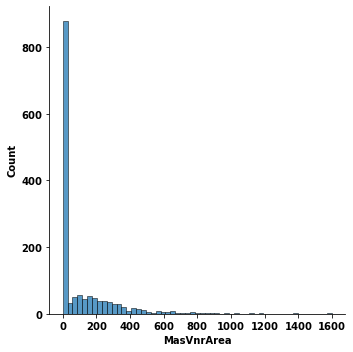

In [23]:
# Masonry veneer area in square feet
print(df_house_numeric['MasVnrArea'].describe())
print(f'Values which are Null: {df_house["MasVnrArea"].isnull().sum()}')
sns.displot(data= df_house_numeric['MasVnrArea'])
plt.show()

In [24]:
df_house[df_house['MasVnrArea'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
Id                                                                       
235          60       RL          NaN     7851   Pave  No alley access   
530          20       RL          NaN    32668   Pave  No alley access   
651          60       FV      65.0000     8125   Pave  No alley access   
937          20       RL      67.0000    10083   Pave  No alley access   
974          20       FV      95.0000    11639   Pave  No alley access   
978         120       FV      35.0000     4274   Pave             Pave   
1244         20       RL     107.0000    13891   Pave  No alley access   
1279         60       RL      75.0000     9473   Pave  No alley access   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
Id                                                                     
235       Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
530       IR1         Lvl    AllPub   CulDSac       Gtl      Crawfor   
651       Reg         Lvl    AllPub    Inside       Gtl      Somerst   
937       Reg         Lvl    AllPub    Inside       Gtl      SawyerW   
974       Reg         Lvl    AllPub    Corner       Gtl      Somerst   
978       IR1         Lvl    AllPub    Inside       Gtl      Somerst   
1244      Reg         Lvl    AllPub    Inside       Gtl      NridgHt   
1279      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   

     Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  \
Id                                                                       
235        Norm       Norm     1Fam     2Story           6           5   
530        Norm       Norm     1Fam     1Story           6           3   
651        Norm       Norm     1Fam     2Story           7           6   
937        Norm       Norm     1Fam     1Story           7           5   
974        Norm       Norm     1Fam     1Story           7           5   
978        Norm       Norm   TwnhsE     1Story           7           5   
1244       Norm       Norm     1Fam     1Story          10           5   
1279       Norm       Norm     1Fam     2Story           8           5   

      YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
Id                                                                        
235  2002-01-01   2002-01-01     Gable  CompShg     VinylSd     VinylSd   
530  1957-01-01   1975-01-01       Hip  CompShg     Wd Sdng       Stone   
651  2007-01-01   2007-01-01     Gable  CompShg     CemntBd     CmentBd   
937  2003-01-01   2003-01-01     Gable  CompShg     VinylSd     VinylSd   
974  2007-01-01   2008-01-01     Gable  CompShg     CemntBd     CmentBd   
978  2006-01-01   2007-01-01     Gable  CompShg     VinylSd     VinylSd   
1244 2006-01-01   2006-01-01     Gable  CompShg     VinylSd     VinylSd   
1279 2002-01-01   2002-01-01     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                             
235        None         NaN        Gd        TA      PConc       Gd       TA   
530        None         NaN        Gd        TA      PConc       TA       TA   
651        None         NaN        Gd        TA      PConc       Gd       TA   
937        None         NaN        Gd        TA      PConc       Gd       TA   
974        None         NaN        Gd        TA      PConc       Gd       TA   
978        None         NaN        Gd        TA      PConc       Gd       TA   
1244       None         NaN        Ex        TA      PConc       Ex       Gd   
1279       None         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
235            No          GLQ         625          Unf           0   
530            No          Rec       

In [25]:
df_house.groupby(by='MSSubClass')['MasVnrArea'].mean()

MSSubClass
20    104.3553
30     12.1304
40      0.0000
45      0.0000
50     34.4097
60    181.1486
70      3.7333
75      0.0000
80    128.6034
85     52.5500
90    111.0000
120   113.4419
160   169.0159
180    24.2000
190    15.6667
Name: MasVnrArea, dtype: float64

In [26]:
# Based on the above data MasVnrArea is imputed using Stratefied mean since MasVnrType and MasVnrArea are related
# Need to check why Stratefied mean is not working

# df_house['MasVnrArea'].fillna(df_house.groupby(by='MasVnrType')['MasVnrArea'].mean(), inplace=True)

In [27]:
# Impute the null values will 0
df_house['MasVnrArea'].fillna(0, inplace=True)
df_house['MasVnrArea'].isnull().sum()

0

In [28]:
df_house['MasVnrArea'].isnull().sum()

0

count   1460.0000
mean     103.1171
std      180.7314
min        0.0000
25%        0.0000
50%        0.0000
75%      164.2500
max     1600.0000
Name: MasVnrArea, dtype: float64
Values which are still Null: 0


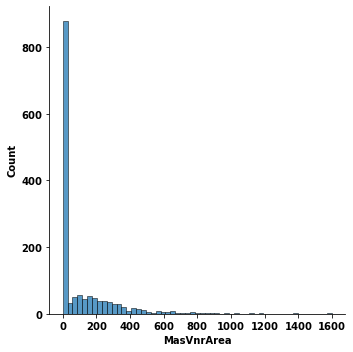

In [29]:
# Masonry veneer area in square feet
print(df_house['MasVnrArea'].describe())
print(f'Values which are still Null: {df_house["MasVnrArea"].isnull().sum()}')
sns.displot(data= df_house_numeric['MasVnrArea'])
plt.show()

count   1201.0000
mean      70.0500
std       24.2848
min       21.0000
25%       59.0000
50%       69.0000
75%       80.0000
max      313.0000
Name: LotFrontage, dtype: float64
259


[]

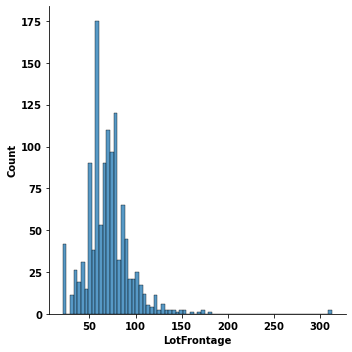

In [30]:
# Linear feet of street connected to property has around 17% of data as null. Droping 17% of data might not be a good idea
print(df_house_numeric['LotFrontage'].describe())
print(df_house_numeric['LotFrontage'].isna().sum())
sns.displot(data=df_house_numeric['LotFrontage'])
plt.plot()

In [31]:
# Based on the above we will do a KNN Imputation imputation
from sklearn.impute import KNNImputer

In [32]:
# KNN Imputation works on the data set with multiple columns
impu = KNNImputer()
df_house['LotFrontage'] = pd.DataFrame(impu.fit_transform(df_house[['LotFrontage', 'LotArea']])).loc[:,0]

df_house['LotFrontage'].isnull().sum()

1

count   1459.0000
mean      71.1907
std       23.9204
min       21.0000
25%       60.0000
50%       70.0000
75%       82.0000
max      313.0000
Name: LotFrontage, dtype: float64
1


[]

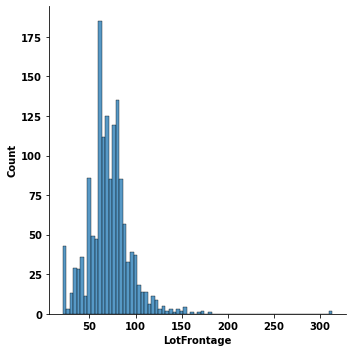

In [33]:
print(df_house['LotFrontage'].describe())
print(df_house['LotFrontage'].isna().sum())
sns.displot(data=df_house['LotFrontage'])
plt.plot()

In [34]:
df_house[df_house['LotFrontage'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
Id                                                                       
1460         20       RL          NaN     9937   Pave  No alley access   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
Id                                                                     
1460      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  \
Id                                                                       
1460       Norm       Norm     1Fam     1Story           5           6   

      YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
Id                                                                        
1460 1965-01-01   1965-01-01     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                             
1460       None      0.0000        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1460           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1460        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1460      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
Id                                                                 
1460         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
Id                                                                   
1460             6        Typ           0  No Fireplace     Attchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
Id                                                                            
1460  1965-01-01          Fin           1         276         TA         TA   

     PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                   
1460          Y         736           68              0          0   

      ScreenPorch  PoolArea   PoolQC     Fence MiscFeature  MiscVal  MoSold  \
Id                                                                            
1460            0         0  No Pool  No Fence        None        0       6   

         YrSold SaleType SaleCondition  SalePrice  
Id                                                 
1460 2008-01-01       WD        Normal     147500

In [35]:
df_house.shape

(1460, 80)

In [36]:
df_house.dropna(subset=['LotFrontage'], axis=0, inplace=True)
df_house.shape

(1459, 80)

In [37]:
df_house.columns[(df_house.isna().sum()/len(df_house)).values>0]

Index(['GarageYrBlt'], dtype='object')

##### Interpretation
Only GarageYrBlt has null values

In [38]:
df_house.dropna(subset=['GarageYrBlt'], axis=0, inplace=True)

In [39]:
df_house.columns[(df_house.isna().sum()/len(df_house)).values>0]

Index([], dtype='object')

##### Interpretation
There are no null values in the data

In [40]:
df_house.shape

(1378, 80)

## Data Visualization and Comparing the data

In [41]:
df_house_numeric = df_house.select_dtypes(include=np.number)
df_house_categorical = df_house.select_dtypes(exclude=np.number)

<Figure size 2160x3600 with 0 Axes>

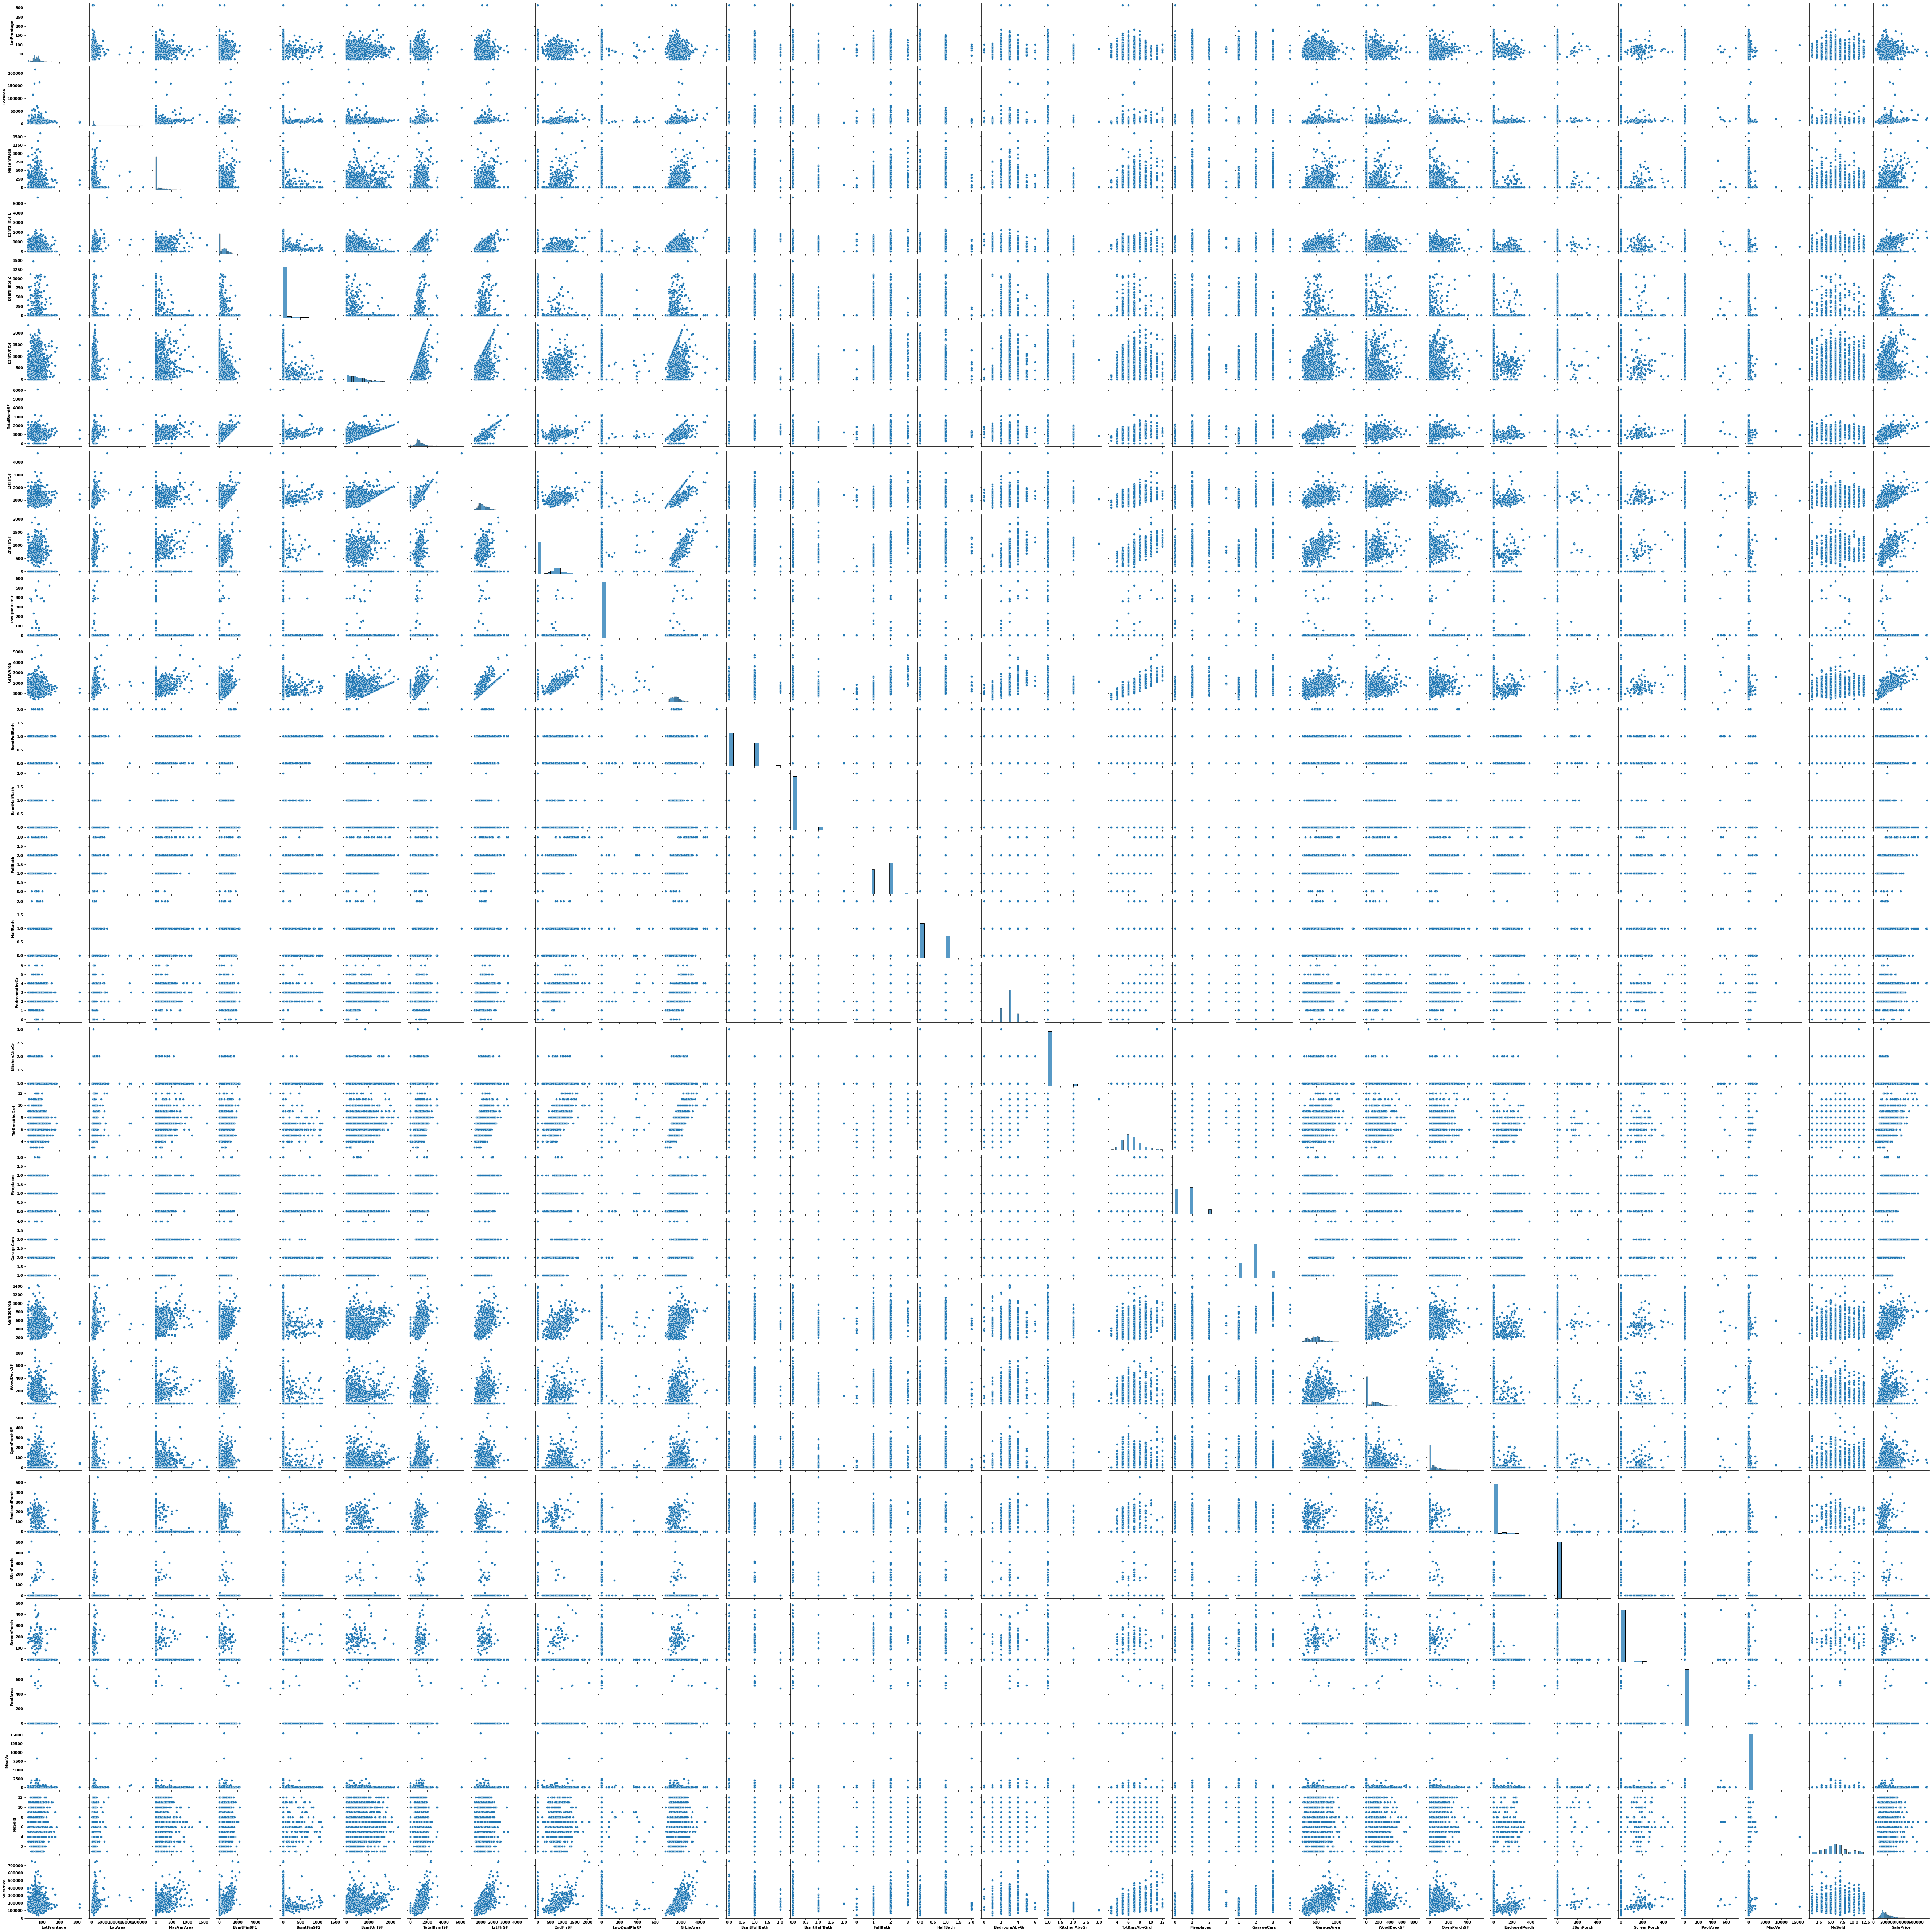

In [42]:
plt.figure(figsize=(30, 50))
sns.pairplot(data=df_house_numeric)
plt.show()

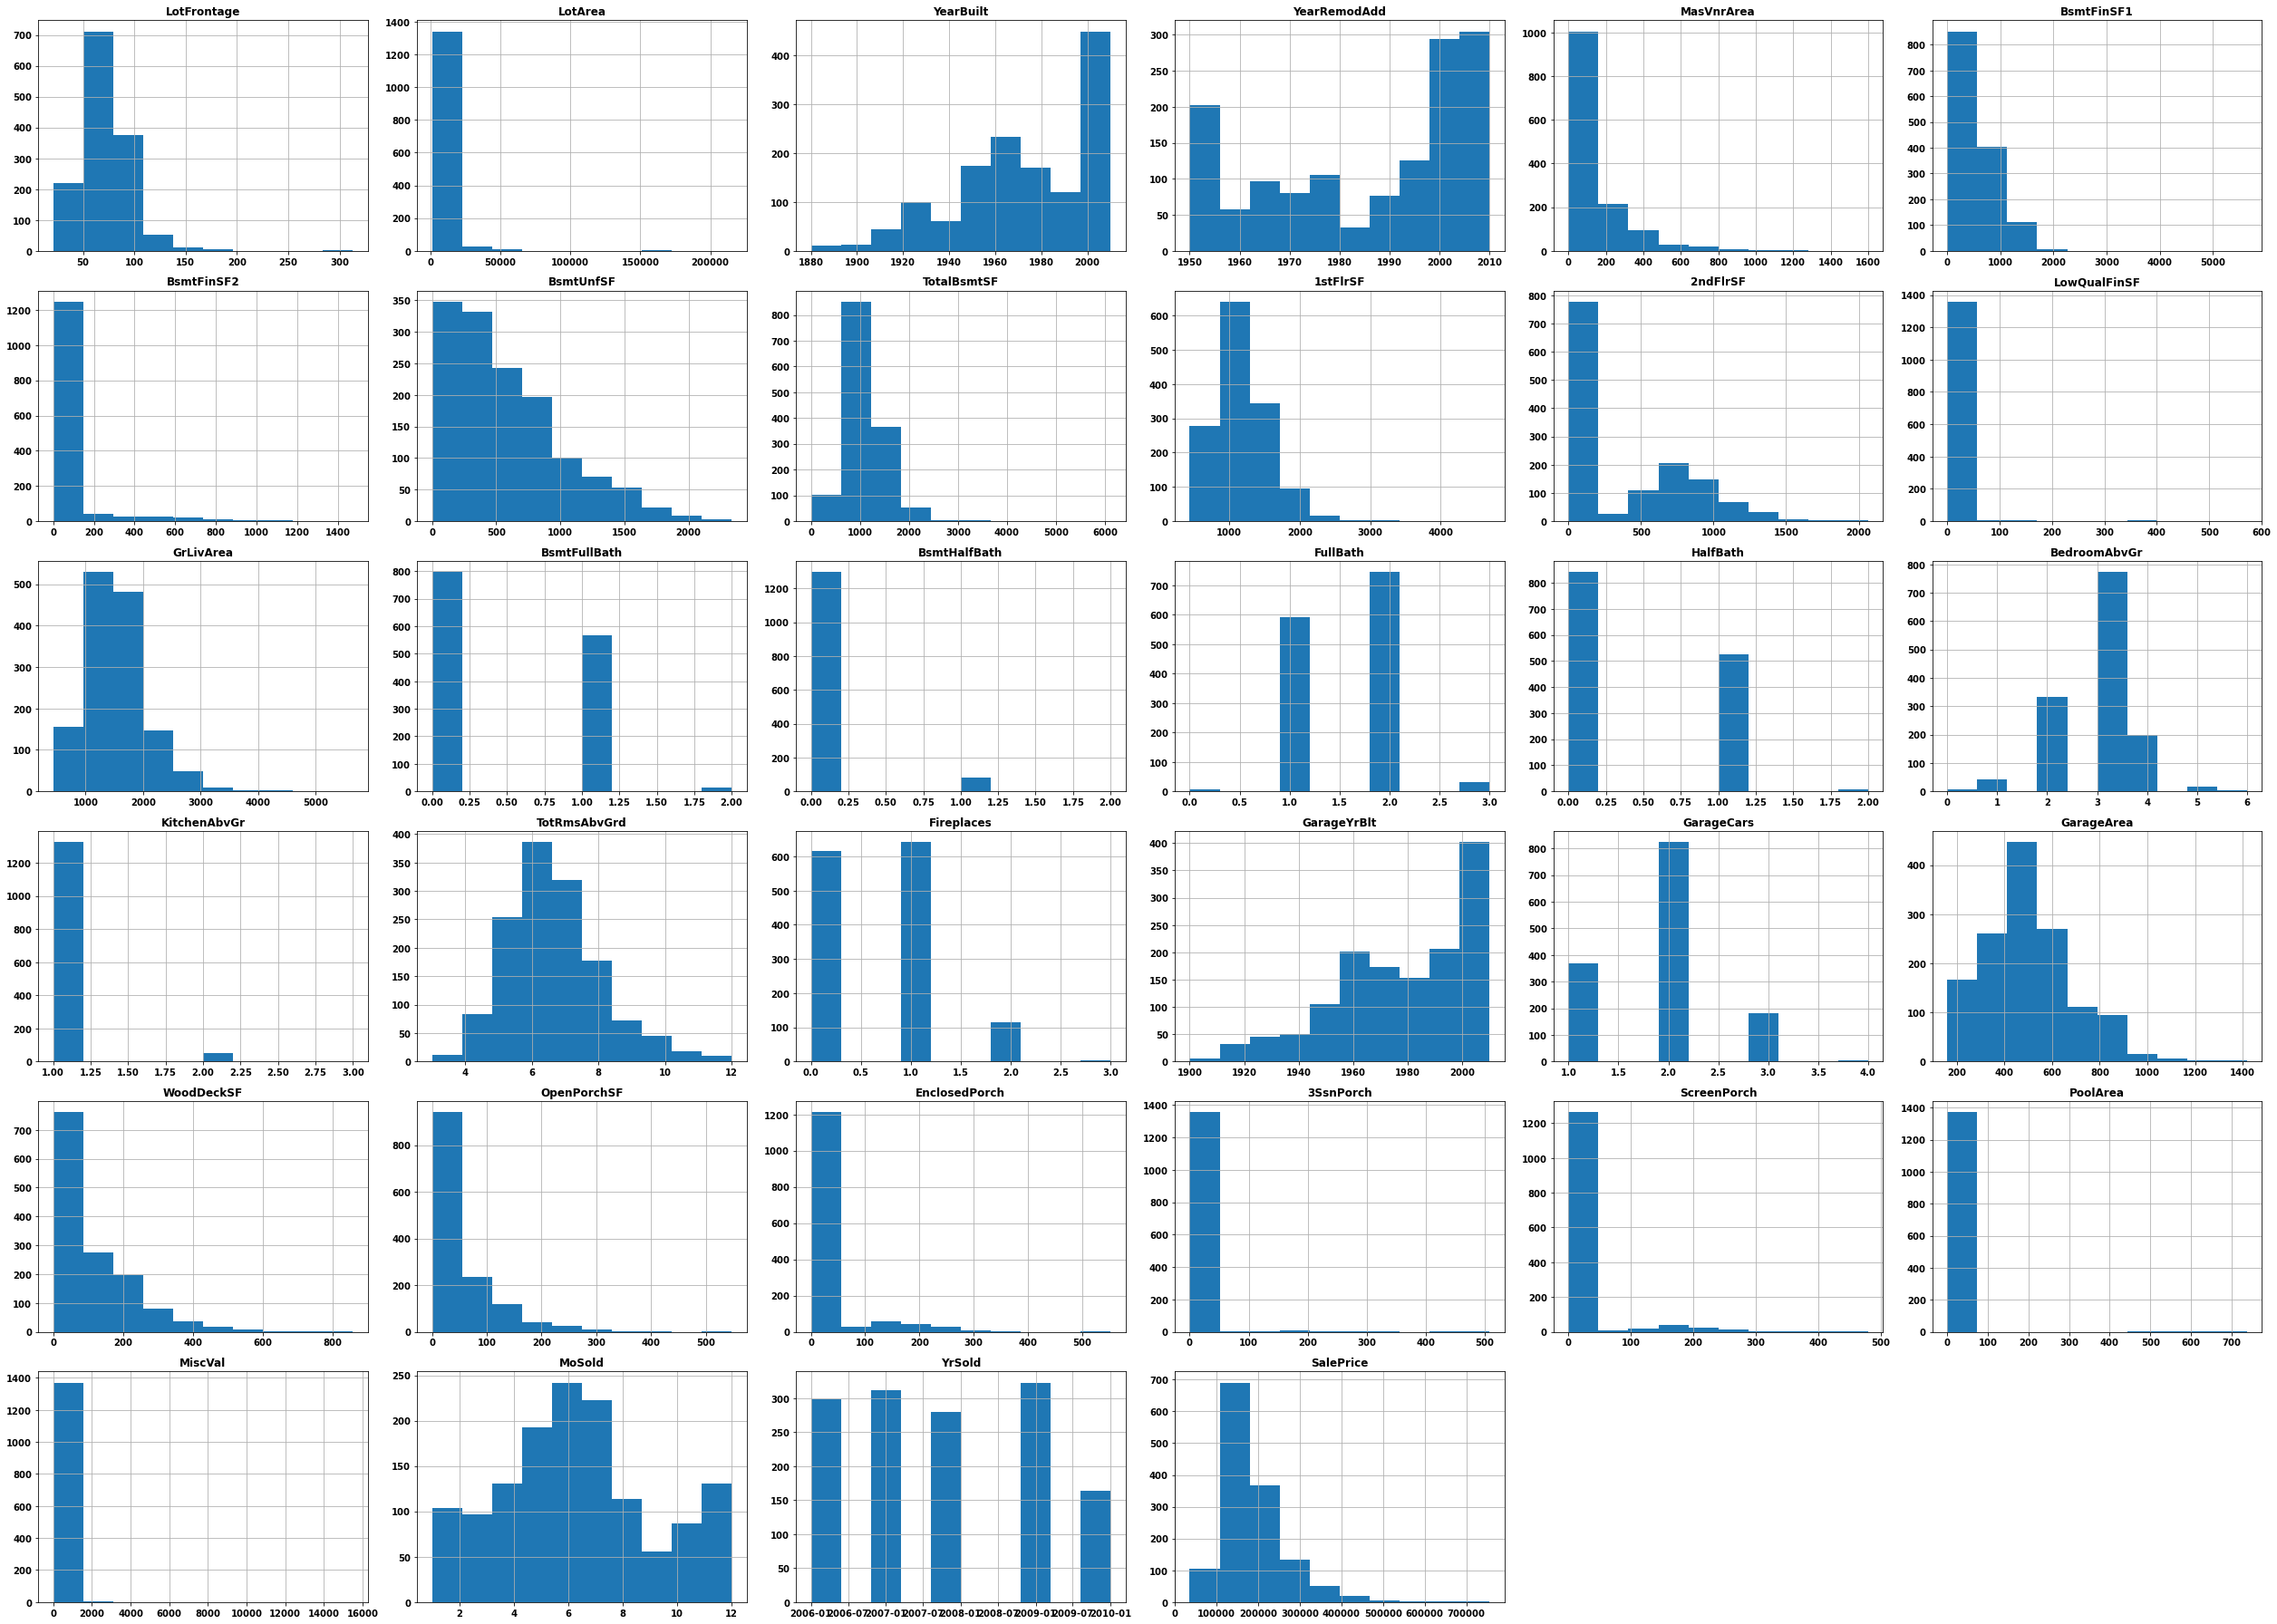

In [48]:
plt.rcParams['figure.figsize']=(35,25)
# plt.figure(figsize=(50, 30))
df_house.hist()
plt.tight_layout()
plt.show()

In [45]:
len(df_house_categorical.columns)

50

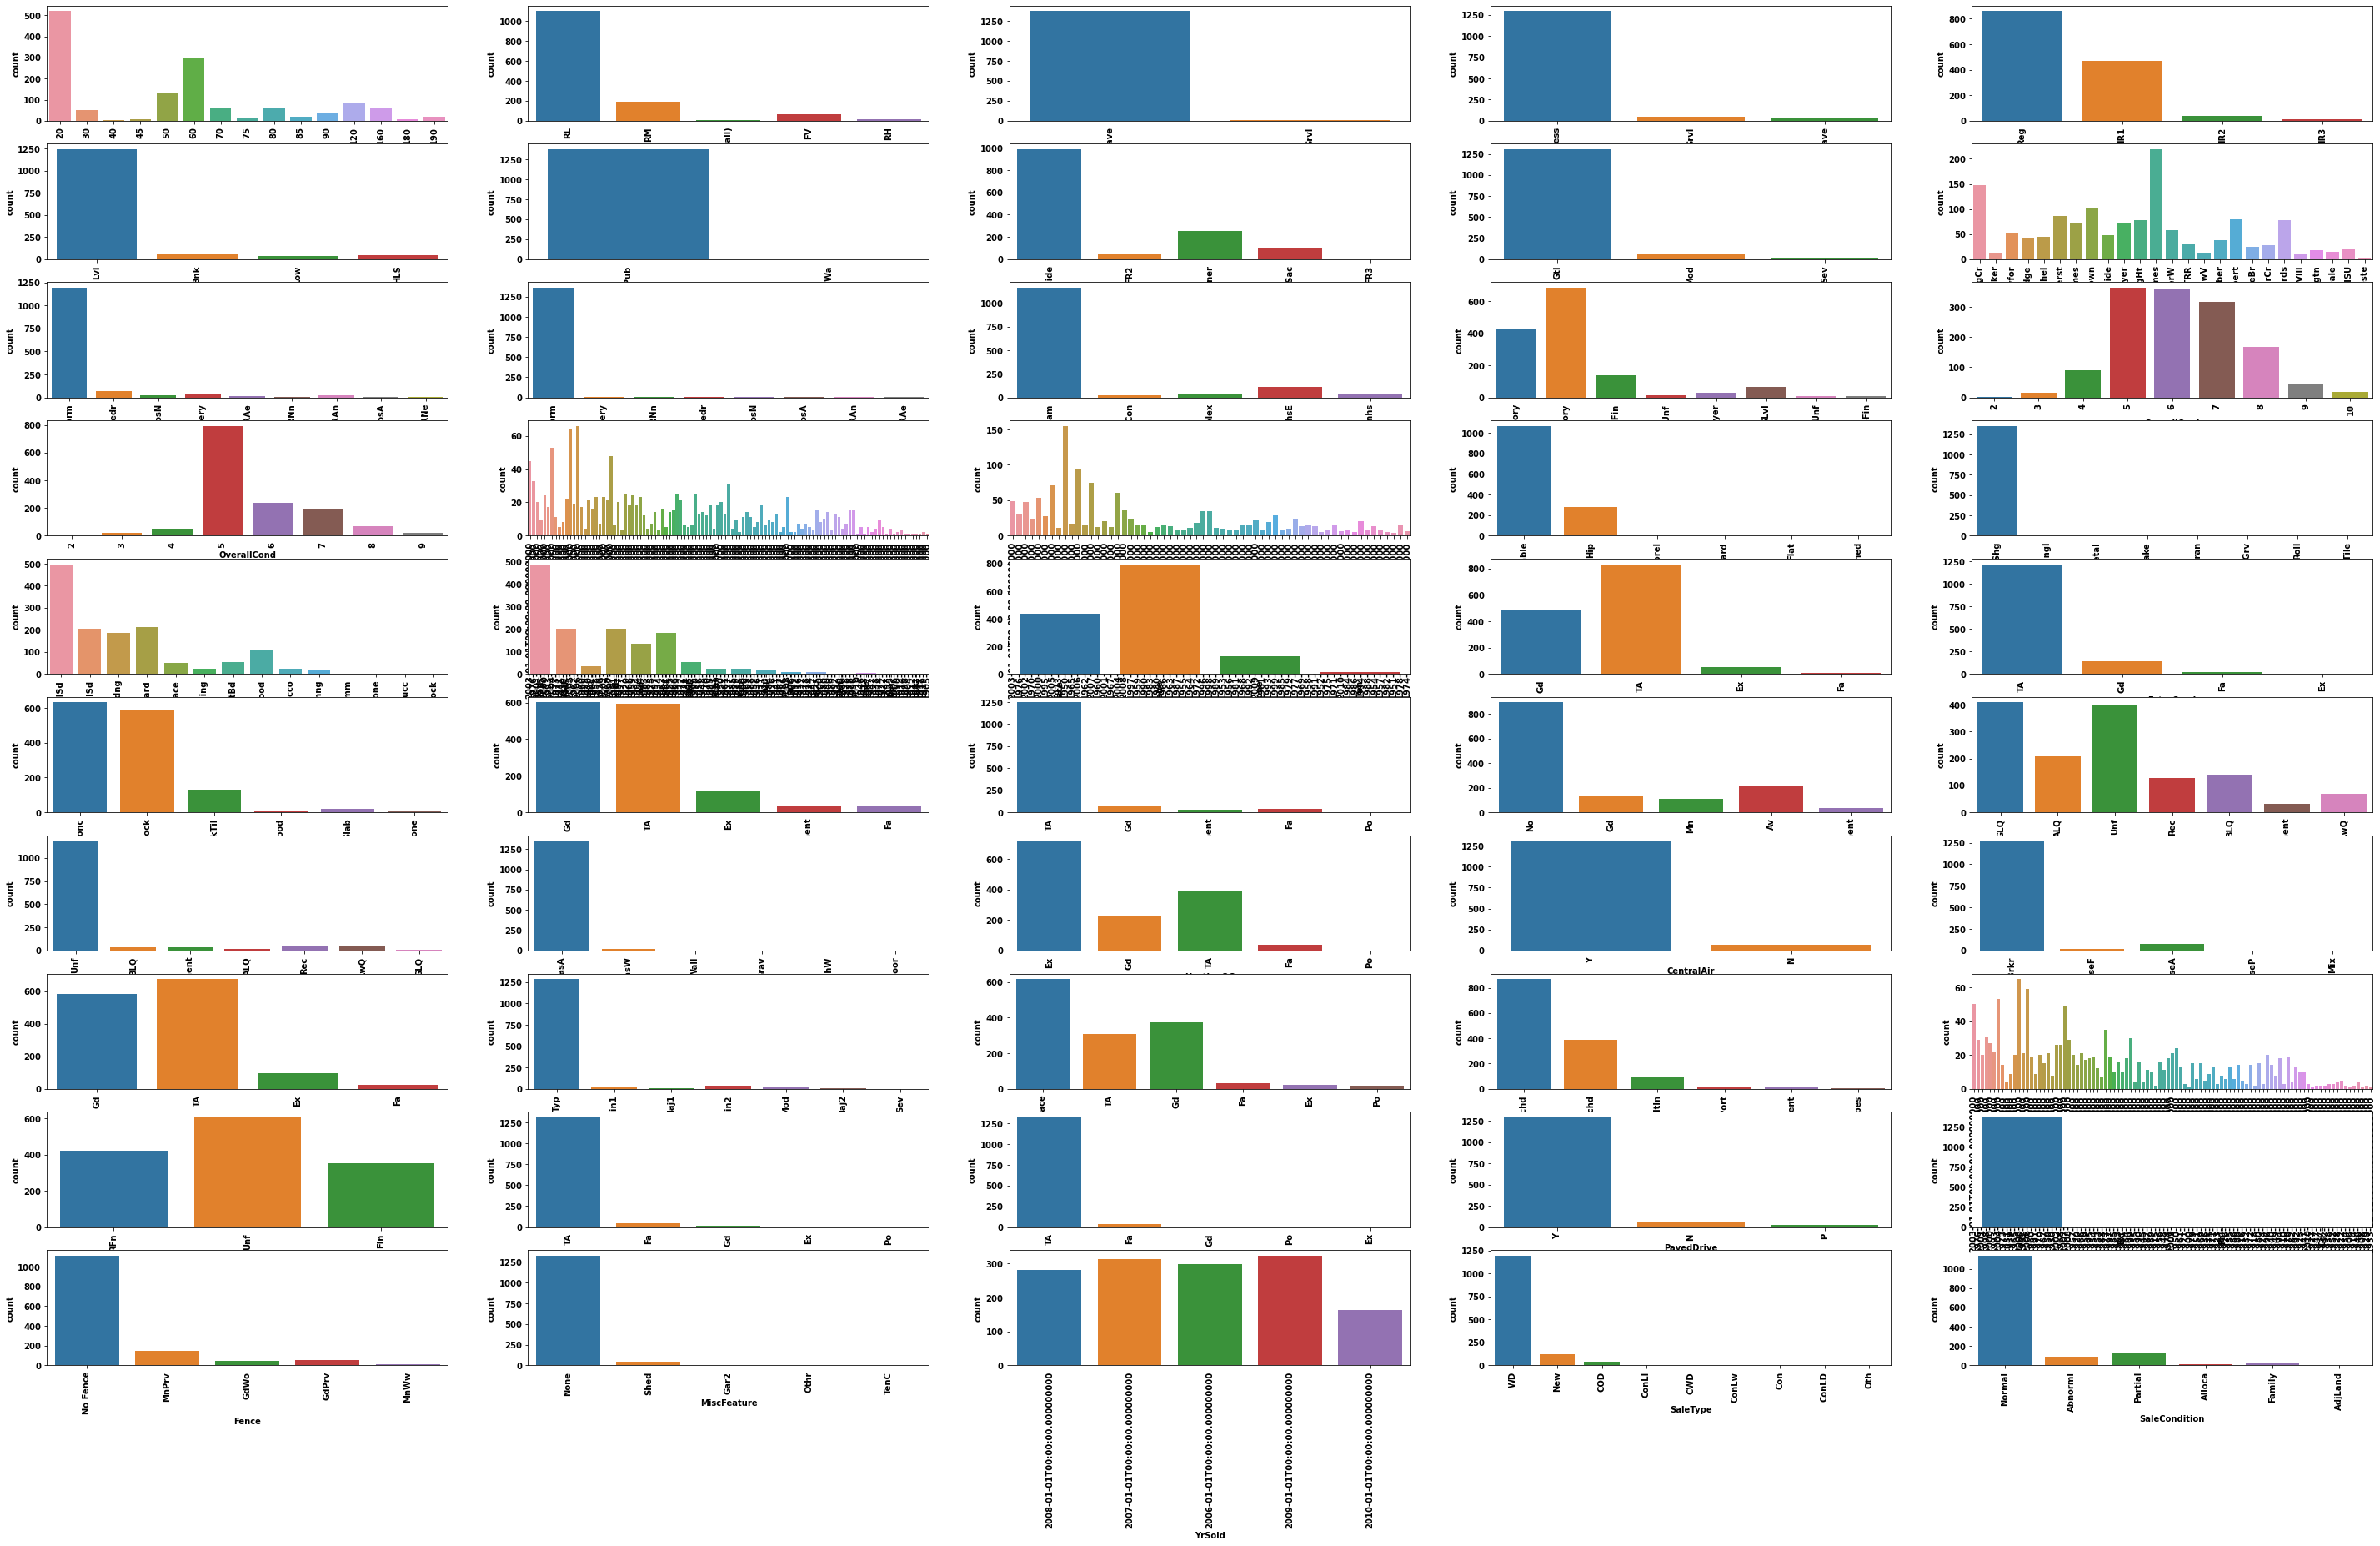

In [49]:
plt.rcParams['figure.figsize']=(50,30)
for i in range(len(df_house_categorical.columns)):
    plt.subplot(10, 5, i+1)
    sns.countplot(data=df_house_categorical, x=df_house_categorical.columns[i],
                 dodge=True)
    plt.xticks(rotation=90)

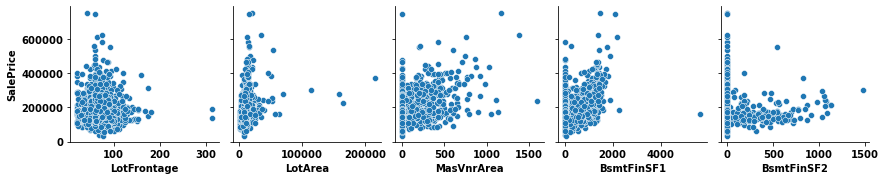

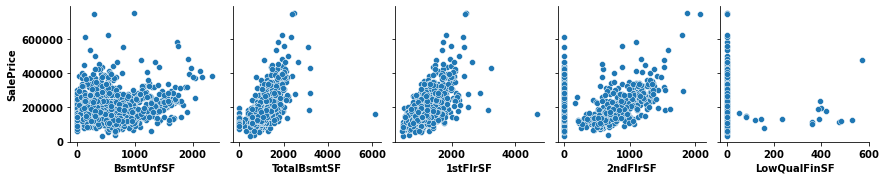

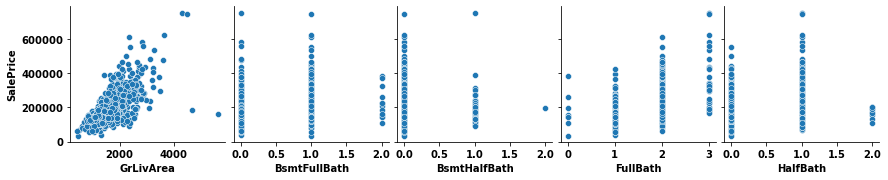

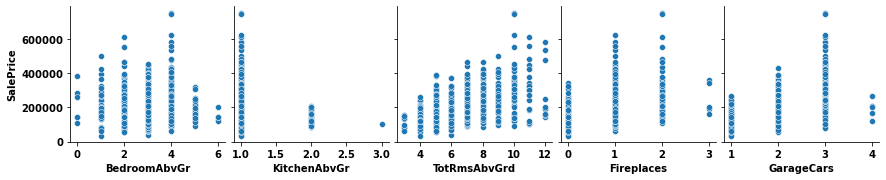

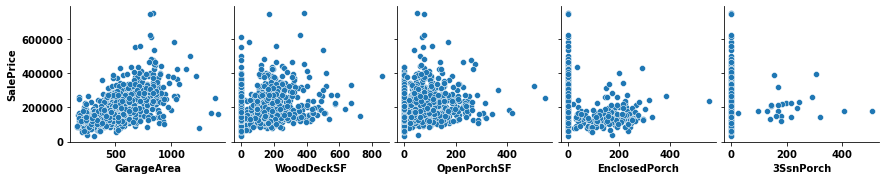

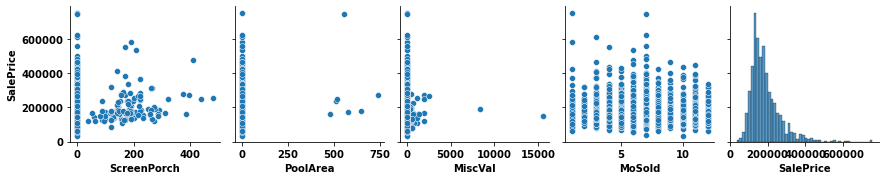

In [50]:
for i in range(0, len(df_house_numeric.columns), 5):
    sns.pairplot(data=df_house_numeric,
                x_vars=df_house_numeric.columns[i: i+5],
                y_vars=['SalePrice'])

## Outliers

<Figure size 864x648 with 0 Axes>

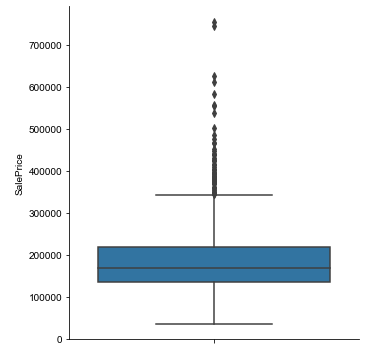

In [51]:
plt.figure(figsize=(12, 9))
sns.catplot(kind='box', data=df_house, y='SalePrice')
sns.set_style(style='darkgrid')
plt.show()

In [52]:
print("There are outliers for SalePrice")

There are outliers for SalePrice


## Correlation

In [53]:
corr_data = df_house_numeric.corr()
corr_data

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage         1.0000  -0.0341     -0.0341     -0.0397     -0.0039   
LotArea            -0.0341   1.0000      0.0955      0.2102      0.1102   
MasVnrArea         -0.0341   0.0955      1.0000      0.2542     -0.0765   
BsmtFinSF1         -0.0397   0.2102      0.2542      1.0000     -0.0559   
BsmtFinSF2         -0.0039   0.1102     -0.0765     -0.0559      1.0000   
BsmtUnfSF           0.0313  -0.0098      0.1129     -0.5027     -0.2137   
TotalBsmtSF        -0.0115   0.2530      0.3537      0.5213      0.1002   
1stFlrSF           -0.0190   0.2915      0.3323      0.4466      0.0939   
2ndFlrSF           -0.0397   0.0462      0.1727     -0.1426     -0.1059   
LowQualFinSF        0.0129   0.0102     -0.0607     -0.0500      0.0076   
GrLivArea          -0.0467   0.2572      0.3893      0.2084     -0.0191   
BsmtFullBath       -0.0142   0.1612      0.0833      0.6472      0.1584   
BsmtHalfBath       -0.0114   0.0465      0.0182      0.0610      0.0745   
FullBath           -0.0058   0.1171      0.2684      0.0449     -0.0885   
HalfBath           -0.0119   0.0058      0.1939     -0.0083     -0.0369   
BedroomAbvGr       -0.0165   0.1198      0.1088     -0.1182     -0.0079   
KitchenAbvGr       -0.0218  -0.0125     -0.0199     -0.0657     -0.0376   
TotRmsAbvGrd       -0.0267   0.1857      0.2853      0.0446     -0.0408   
Fireplaces         -0.0329   0.2651      0.2337      0.2546      0.0404   
GarageCars         -0.0177   0.1380      0.3610      0.2030     -0.0739   
GarageArea         -0.0193   0.1676      0.3665      0.2901     -0.0461   
WoodDeckSF         -0.0078   0.1684      0.1549      0.1936      0.0585   
OpenPorchSF         0.0233   0.0851      0.1269      0.1202      0.0045   
EnclosedPorch      -0.0562  -0.0134     -0.1050     -0.0966      0.0458   
3SsnPorch          -0.0135   0.0184      0.0159      0.0240     -0.0313   
ScreenPorch         0.0101   0.0386      0.0549      0.0564      0.0877   
PoolArea           -0.0094   0.0769      0.0100      0.1417      0.0416   
MiscVal             0.0228   0.0403     -0.0293      0.0069      0.0061   
MoSold              0.0151  -0.0006     -0.0111     -0.0174     -0.0189   
SalePrice          -0.0377   0.2529      0.4630      0.3760     -0.0227   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage       0.0313      -0.0115   -0.0190   -0.0397        0.0129   
LotArea          -0.0098       0.2530    0.2915    0.0462        0.0102   
MasVnrArea        0.1129       0.3537    0.3323    0.1727       -0.0607   
BsmtFinSF1       -0.5027       0.5213    0.4466   -0.1426       -0.0500   
BsmtFinSF2       -0.2137       0.1002    0.0939   -0.1059        0.0076   
BsmtUnfSF         1.0000       0.4066    0.3117   -0.0070       -0.0009   
TotalBsmtSF       0.4066       1.0000    0.8225   -0.1971       -0.0507   
1stFlrSF          0.3117       0.8225    1.0000   -0.2236       -0.0188   
2ndFlrSF         -0.0070      -0.1971   -0.2236    1.0000        0.0455   
LowQualFinSF     -0.0009      -0.0507   -0.0188    0.0455        1.0000   
GrLivArea         0.2263       0.4424    0.5548    0.6834        0.1018   
BsmtFullBath     -0.4249       0.3093    0.2514   -0.1735       -0.0279   
BsmtHalfBath     -0.0965      -0.0058   -0.0006   -0.0217        0.0043   
FullBath          0.2943       0.3131    0.3664    0.4167       -0.0234   
HalfBath         -0.0518      -0.0752   -0.1462    0.6181        0.0017   
BedroomAbvGr      0.1489       0.0239    0.1048    0.5078        0.0566   
KitchenAbvGr      0.0188      -0.0643    0.0769    0.0397       -0.0202   
TotRmsAbvGrd      0.2329       0.2683    0.3966    0.6122        0.0906   
Fireplaces        0.0467       0.3309    0.4029    0.1922        0.0033   
GarageCars        0.2435       0.4336    0.4403    0.1853       -0.0173   
GarageArea        0.2004       0.4919    0.4958    0.1274        0.0150   
WoodDeckSF       -0.0018       0.2241  

In [54]:
corr_data[(corr_data>.7) | (corr_data <-.7)]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage         1.0000      NaN         NaN         NaN         NaN   
LotArea                NaN   1.0000         NaN         NaN         NaN   
MasVnrArea             NaN      NaN      1.0000         NaN         NaN   
BsmtFinSF1             NaN      NaN         NaN      1.0000         NaN   
BsmtFinSF2             NaN      NaN         NaN         NaN      1.0000   
BsmtUnfSF              NaN      NaN         NaN         NaN         NaN   
TotalBsmtSF            NaN      NaN         NaN         NaN         NaN   
1stFlrSF               NaN      NaN         NaN         NaN         NaN   
2ndFlrSF               NaN      NaN         NaN         NaN         NaN   
LowQualFinSF           NaN      NaN         NaN         NaN         NaN   
GrLivArea              NaN      NaN         NaN         NaN         NaN   
BsmtFullBath           NaN      NaN         NaN         NaN         NaN   
BsmtHalfBath           NaN      NaN         NaN         NaN         NaN   
FullBath               NaN      NaN         NaN         NaN         NaN   
HalfBath               NaN      NaN         NaN         NaN         NaN   
BedroomAbvGr           NaN      NaN         NaN         NaN         NaN   
KitchenAbvGr           NaN      NaN         NaN         NaN         NaN   
TotRmsAbvGrd           NaN      NaN         NaN         NaN         NaN   
Fireplaces             NaN      NaN         NaN         NaN         NaN   
GarageCars             NaN      NaN         NaN         NaN         NaN   
GarageArea             NaN      NaN         NaN         NaN         NaN   
WoodDeckSF             NaN      NaN         NaN         NaN         NaN   
OpenPorchSF            NaN      NaN         NaN         NaN         NaN   
EnclosedPorch          NaN      NaN         NaN         NaN         NaN   
3SsnPorch              NaN      NaN         NaN         NaN         NaN   
ScreenPorch            NaN      NaN         NaN         NaN         NaN   
PoolArea               NaN      NaN         NaN         NaN         NaN   
MiscVal                NaN      NaN         NaN         NaN         NaN   
MoSold                 NaN      NaN         NaN         NaN         NaN   
SalePrice              NaN      NaN         NaN         NaN         NaN   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage          NaN          NaN       NaN       NaN           NaN   
LotArea              NaN          NaN       NaN       NaN           NaN   
MasVnrArea           NaN          NaN       NaN       NaN           NaN   
BsmtFinSF1           NaN          NaN       NaN       NaN           NaN   
BsmtFinSF2           NaN          NaN       NaN       NaN           NaN   
BsmtUnfSF         1.0000          NaN       NaN       NaN           NaN   
TotalBsmtSF          NaN       1.0000    0.8225       NaN           NaN   
1stFlrSF             NaN       0.8225    1.0000       NaN           NaN   
2ndFlrSF             NaN          NaN       NaN    1.0000           NaN   
LowQualFinSF         NaN          NaN       NaN       NaN        1.0000   
GrLivArea            NaN          NaN       NaN       NaN           NaN   
BsmtFullBath         NaN          NaN       NaN       NaN           NaN   
BsmtHalfBath         NaN          NaN       NaN       NaN           NaN   
FullBath             NaN          NaN       NaN       NaN           NaN   
HalfBath             NaN          NaN       NaN       NaN           NaN   
BedroomAbvGr         NaN          NaN       NaN       NaN           NaN   
KitchenAbvGr         NaN          NaN       NaN       NaN           NaN   
TotRmsAbvGrd         NaN          NaN       NaN       NaN           NaN   
Fireplaces           NaN          NaN       NaN       NaN           NaN   
GarageCars           NaN          NaN       NaN       NaN           NaN   
GarageArea           NaN          NaN       NaN       NaN           NaN   
WoodDeckSF           NaN          NaN  

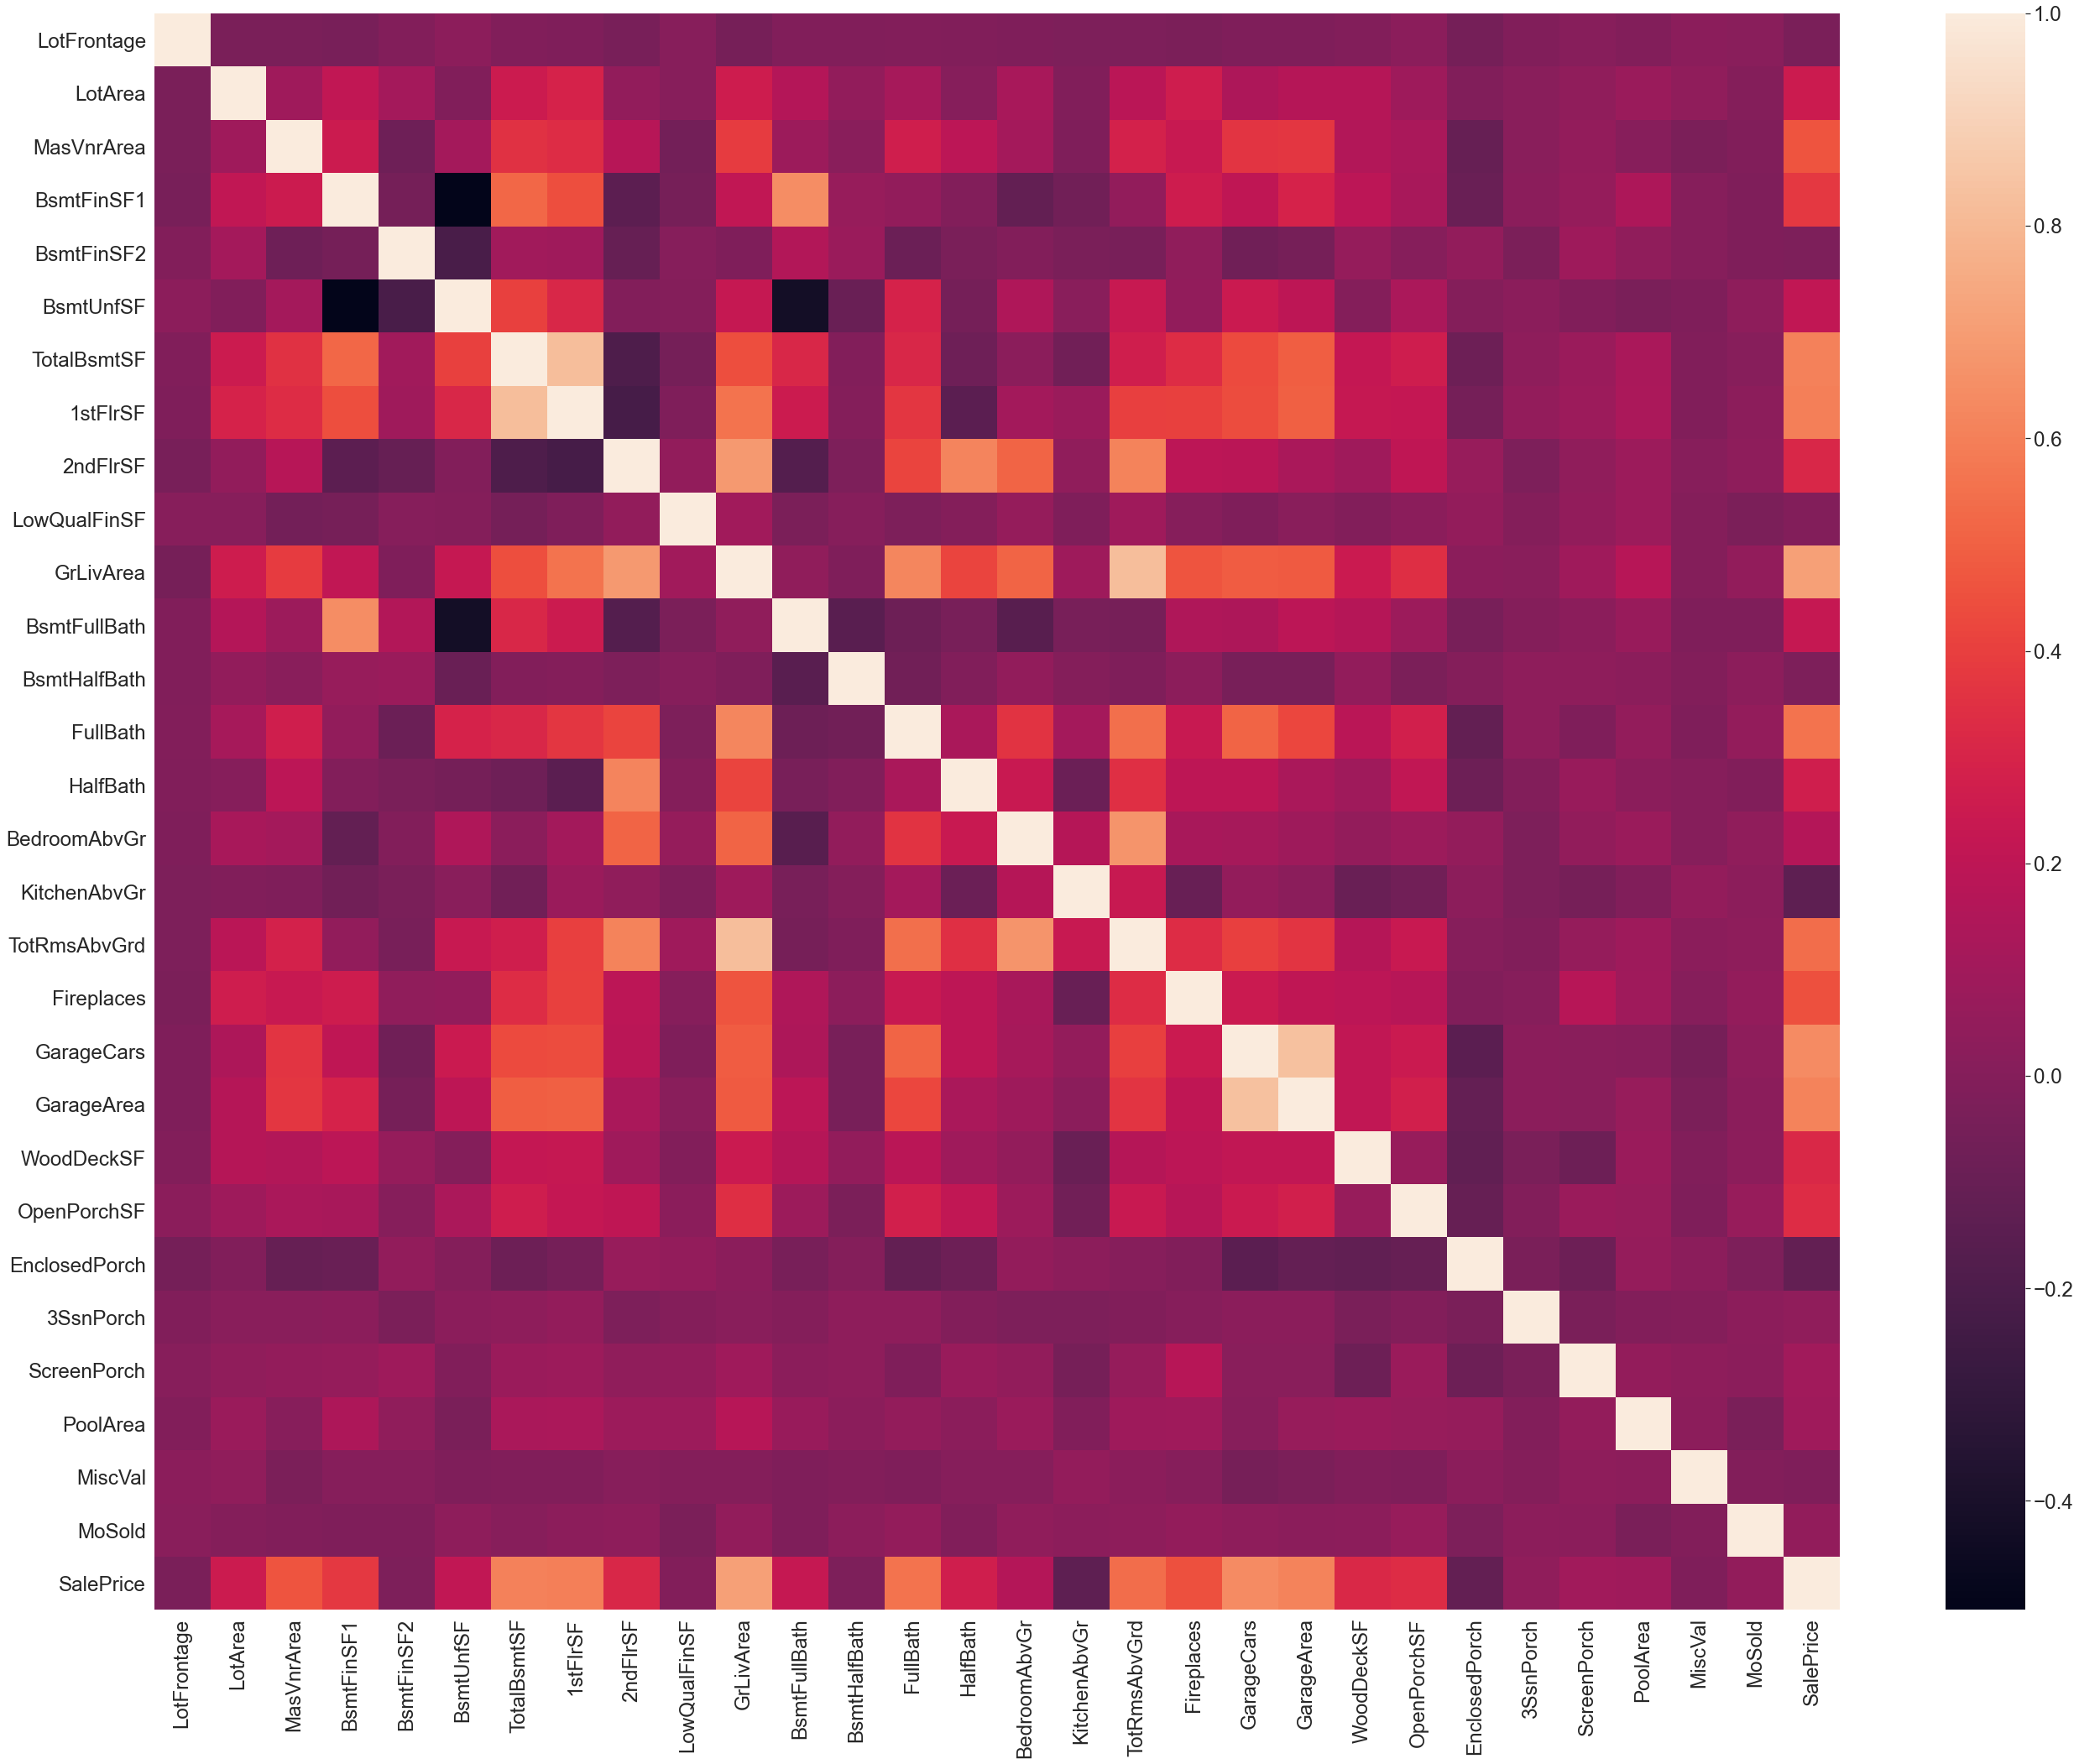

In [55]:
plt.figure(figsize=(45, 35))
sns.set(font_scale=2.2)
sns.heatmap(data=corr_data)
plt.show()

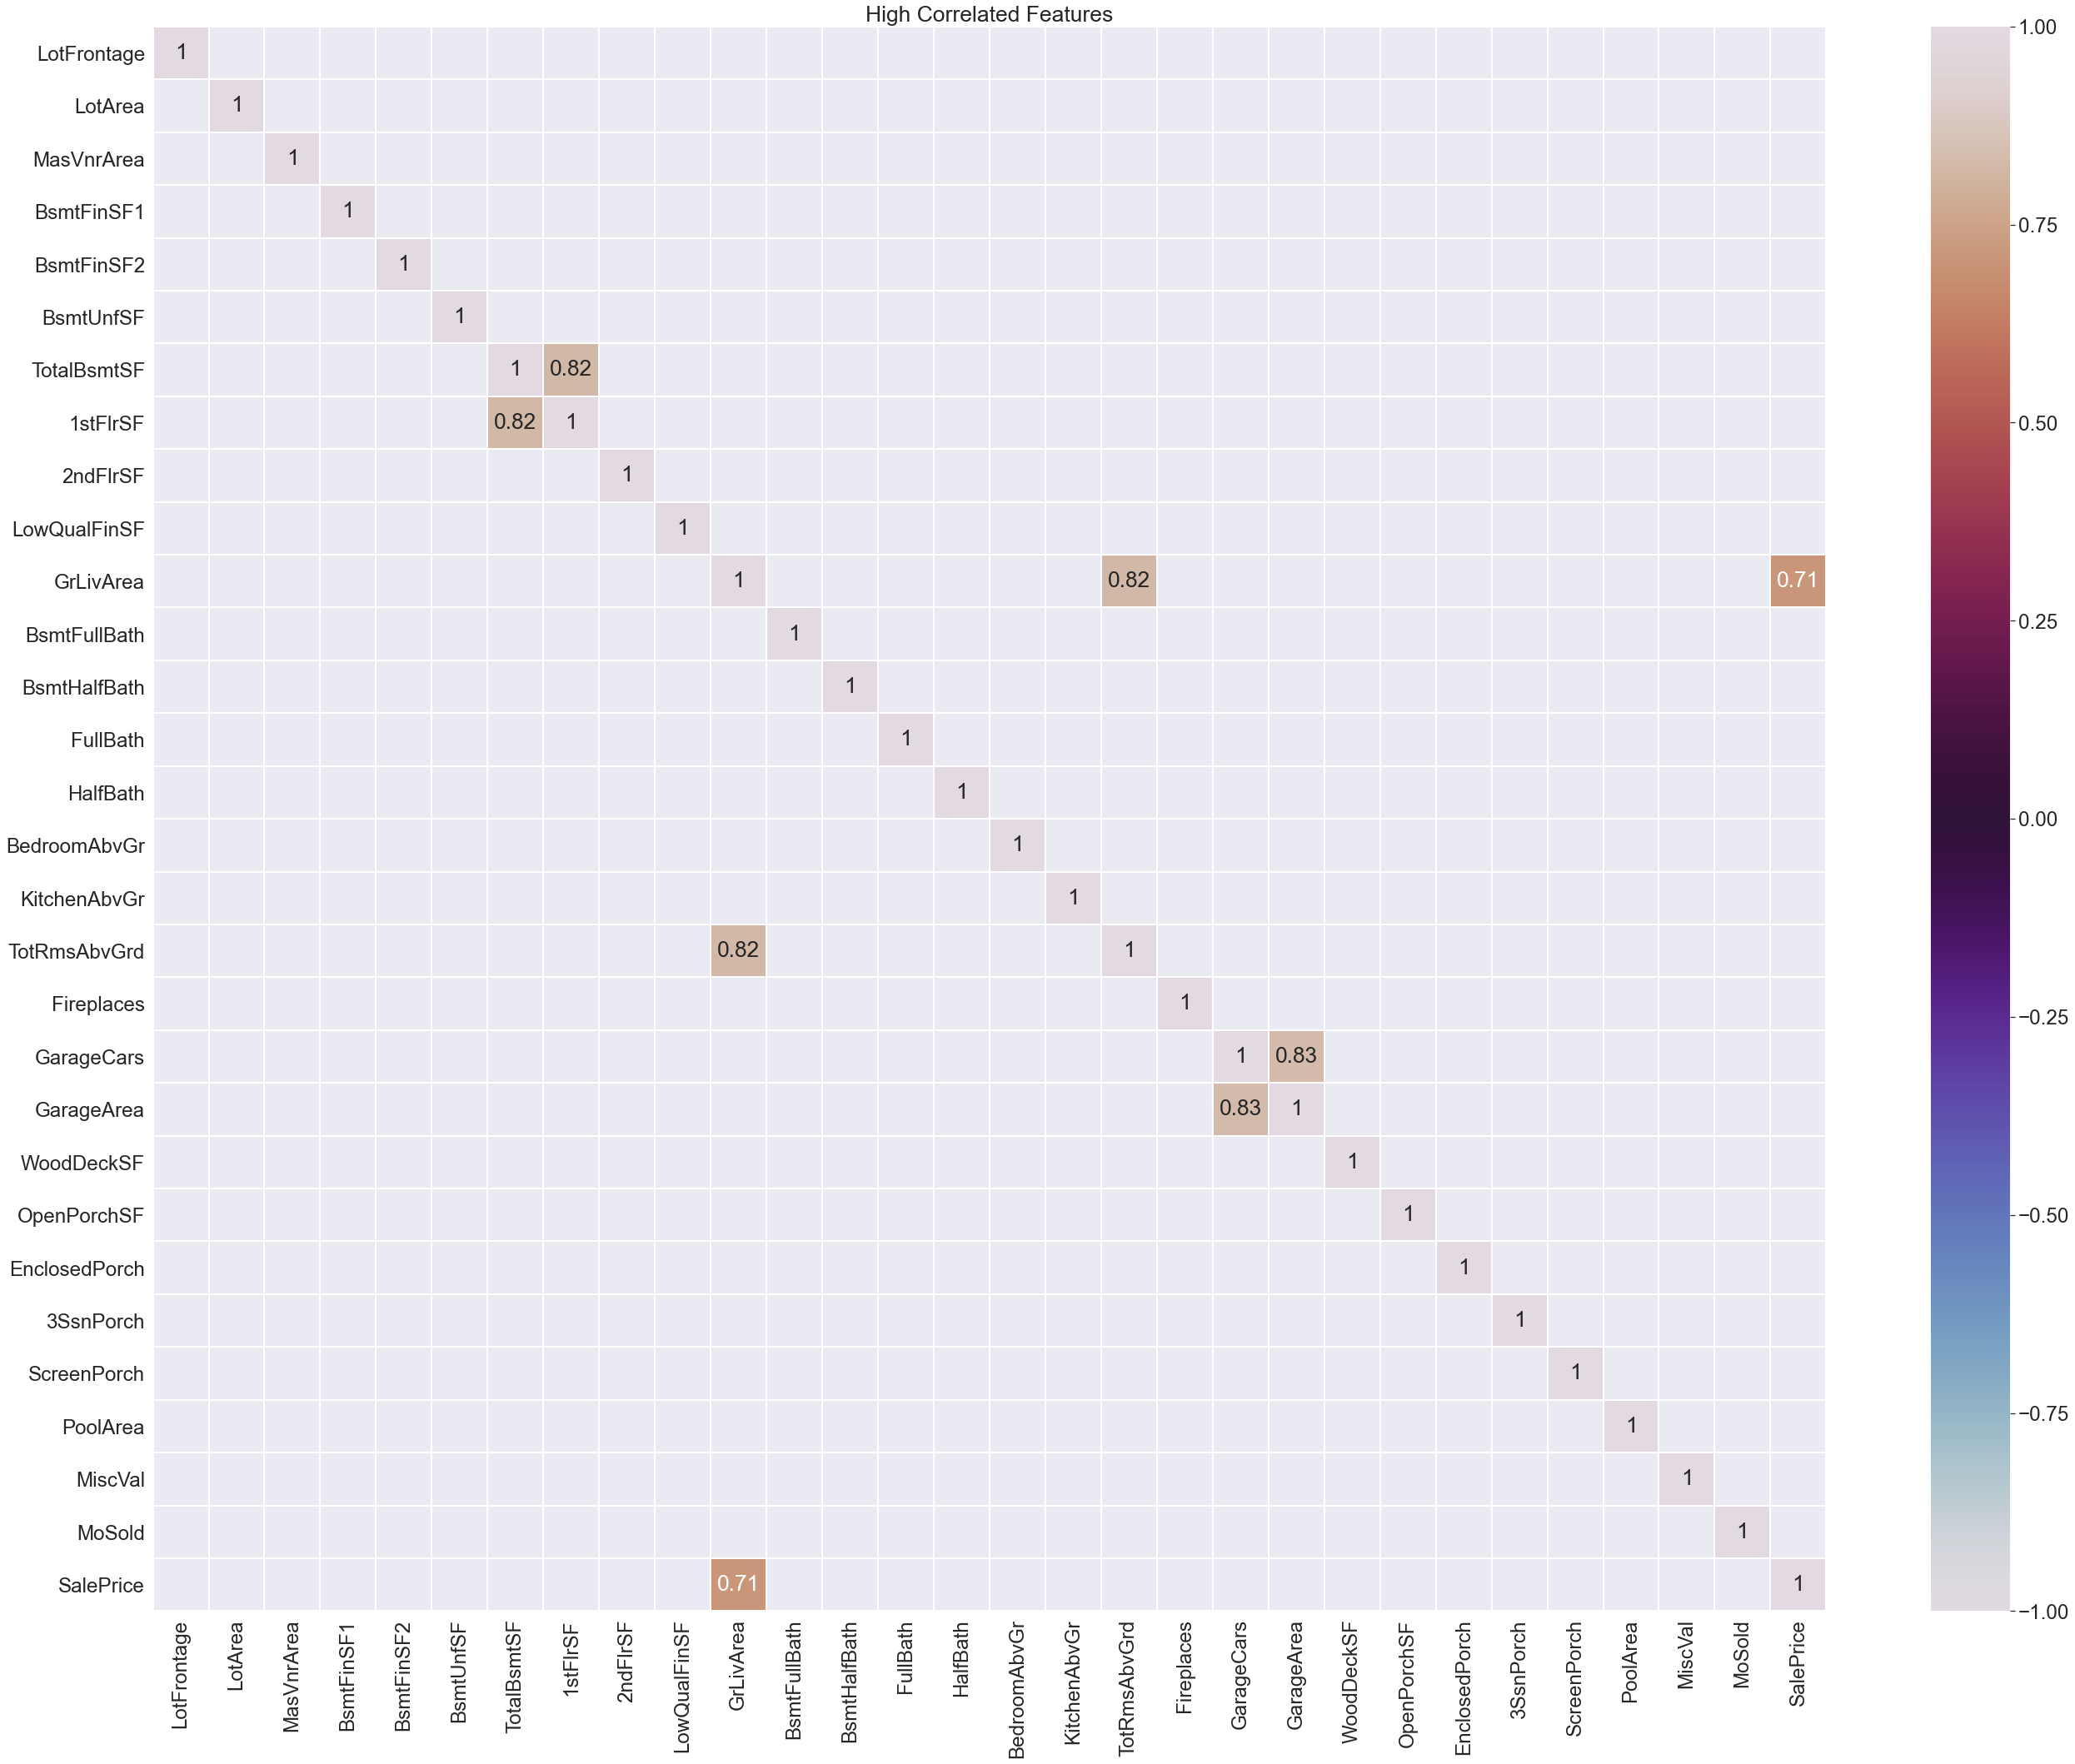

In [56]:
plt.figure(figsize=(45, 35))
sns.set(font_scale=2.2)
sns.heatmap(data=corr_data[(corr_data>.7) | (corr_data <-.7)], cmap='twilight',
           vmin=-1.0, vmax=1.0, linewidths=0.1,
           annot=True)
plt.title('High Correlated Features')
plt.show()

## Linear Regression Assumptions

## Normality Check

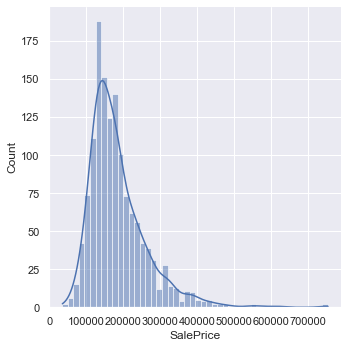

In [57]:
sns.set(font_scale=1)
sns.displot(data=df_house, x='SalePrice', kind='hist', kde=True)
sns.set_style(style='darkgrid')
plt.tight_layout()
plt.show()

#### Shapiro test

to check if

H0: SalePrice is normally distributed

Ha: SalePrice is not normally distributed

In [58]:
stat, p_value = stats.shapiro(df_house['SalePrice'])

# to print the numeric outputs of the Shapiro-Wilk test
print(f'Test Statistic = {stat}, p-value = {p_value}')

# display the conclusion
alpha = 0.05
if p_value > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Test Statistic = 0.862048864364624, p-value = 3.899929893541426e-33
The data is not normally distributed (reject H0)


### Perform Log Transformation

Since the data is not Normal perform log tranformation and check again with Shapiro

In [59]:
df_house['log_SalePrice'] = np.log(df_house['SalePrice'])
df_house[['log_SalePrice', 'SalePrice']].sample(10)

log_SalePrice  SalePrice
Id                            
1004        11.8270     136905
1453        11.8845     145000
125         12.1063     181000
99          11.3266      83000
1082        11.7981     133000
380         12.0951     179000
460         11.6082     110000
1177        11.6911     119500
520         12.3631     234000
151         11.7118     122000

[]

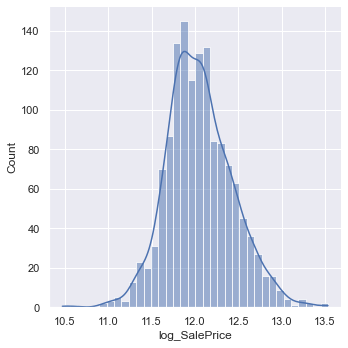

In [60]:
sns.displot(data=df_house, x='log_SalePrice', kind='hist', kde=True)
plt.plot()

In [62]:
stat, p_value = stats.shapiro(df_house['log_SalePrice'])

# to print the numeric outputs of the Shapiro-Wilk test
print(f'Test Statistic = {stat}, p-value = {p_value}')

# display the conclusion
alpha = 0.05
if p_value < alpha:
    print('The data is not normally distributed (reject H0)')
else:
    print('The data is normally distributed (fail to reject H0)')

Test Statistic = 0.9896214008331299, p-value = 2.582997815636645e-08
The data is not normally distributed (reject H0)


## Encoding of Categorical Variables

In [63]:
df_house_numeric = df_house.select_dtypes(include=np.number)
df_house_categorical = df_house.select_dtypes(exclude=np.number)

In [64]:
for col in df_house_categorical.columns:
    dummy_encoded_df = pd.get_dummies(df_house_categorical[col], 
                                     prefix=col, drop_first=True)
    df_house_categorical = pd.concat([df_house_categorical, dummy_encoded_df], 
                                    axis=1)
    df_house_categorical.drop(columns=col, axis=1, inplace=True)

In [65]:
df_house_categorical.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=514)

In [66]:
df_house_encoded = pd.concat([df_house_numeric, df_house_categorical], 
                            axis=1)
# Add constant
df_house_encoded = sm.add_constant(df_house_encoded)
df_house_encoded.sample(5)

const  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id                                                                      
749  1.0000      50.0000    10593    338.0000         919           0   
202  1.0000      50.0000    10125      0.0000         641         279   
1247 1.0000      83.4000     8125      0.0000           0           0   
95   1.0000      70.6000     9337      0.0000         648           0   
382  1.0000      79.0000     7200      0.0000           0           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                          
749         801         1720      1720         0             0       1720   
202         276         1196      1279         0             0       1279   
1247        756          756       756       797             0       1553   
95          176          824       905       881             0       1786   
382        1293         1293      1301         0             0       1301   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                   
749              1             0         2         0             3   
202              0             1         2         0             3   
1247             0             0         2         1             3   
95               1             0         2         1             3   
382              1             0         2         0             2   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
Id                                                                     
749              1             7           1           2         527   
202              1             6           2           2         473   
1247             1             6           0           2         615   
95               1             7           0           2         684   
382              1             5           1           2         572   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                     
749          240           56            154          0            0   
202          238           83              0          0            0   
1247           0           45              0          0            0   
95             0          162              0          0            0   
382          216          121              0          0            0   

      PoolArea  MiscVal  MoSold  SalePrice  log_SalePrice  MSSubClass_30  \
Id                                                                         
749          0        0       3     260400        12.4700              0   
202          0        0       2     171500        12.0523              0   
1247         0        0       3     186500        12.1362              0   
95           0        0       5     204750        12.2295              0   
382          0        0       8     187750        12.1429              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
Id                                                                 
749               0              0              0              0   
202               0              0              0              0   
1247              0              0              0              1   
95                0              0              0              1   
382               0              0              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
Id                                                                 
749               0              0              0              0   
202               0              0              0              0   
1247              0              0              0              0   
95                0              0              0              0   
382               0              0 

## OLS Model (Linear Regression)

In [67]:
# Splitting the data into X and Y and also splitting into train and test

Y = df_house_encoded[['log_SalePrice', 'SalePrice']]
X = df_house_encoded.drop(columns=['log_SalePrice', 'SalePrice'], axis=1)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(964, 544) (414, 544) (964, 2) (414, 2)


In [69]:
# Set the Y to Log SalePrice i.e., the Transformed Sale Price
y_train = Y_train['log_SalePrice']

In [70]:
# building the Ols model
model_ols_log = statsmodels.api.OLS(y_train, 
                                    statsmodels.api.add_constant(X_train)).fit()
model_ols_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          4.82e-203
Time:                        02:38:14   Log-Likelihood:                 1225.6
No. Observations:                 964   AIC:                            -1431.
Df Residuals:                     454   BIC:                             1053.
Df Model:                         509                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.8565      1.001      4.850      0.000       2.889       6.824
LotFrontage                         -0.0003      0.000     -1.678      0.094      -0.001    5.65e-05
LotArea                           2.733e-06   8.19e-07      3.337      0.001    1.12e-06    4.34e-06
MasVnrArea                        3.516e-05    3.7e-05      0.951      0.342   -3.75e-05       0.000
BsmtFinSF1                        1.567e-05   2.51e-05      0.626      0.532   -3.36e-05    6.49e-05
BsmtFinSF2                        8.647e-05   5.88e-05      1.471      0.142   -2.91e-05       0.000
BsmtUnfSF                        -4.344e-05   2.55e-05     -1.701      0.090   -9.36e-05    6.76e-06
TotalBsmtSF                       5.871e-05   3.53e-05      1.663      0.097   -1.07e-05       0.000
1stFlrSF                             0.0001   8.15e-05      1.489      0.137   -3.88e-05       0.000
2ndFlrSF                           5.26e-05   7.25e-05      0.725      0.469      -9e-05       0.000
LowQualFinSF                     -6.132e-05      0.000     -0.288      0.773      -0.000       0.000
GrLivArea                            0.0001   7.54e-05      1.492      0.136   -3.57e-05       0.000
BsmtFullBath                         0.0067      0.014      0.463      0.644      -0.022       0.035
BsmtHalfBath                        -0.0002      0.023     -0.008      0.993      -0.046       0.045
FullBath                             0.0175      0.018      0.970      0.333      -0.018       0.053
HalfBath                             0.0171      0.016      1.089      0.277      -0.014       0.048
BedroomAbvGr                         0.0067      0.012      0.572      0.567      -0.016       0.030
KitchenAbvGr                        -0.0016      0.083     -0.020      0.984      -0.166       0.162
TotRmsAbvGrd                         0.0083      0.007      1.160      0.247      -0.006       0.022
Fireplaces                           0.0255      0.019      1.367      0.172      -0.011       0.062
GarageCars                           0.0185      0.017      1.106      0.269      -0.014       0.051
GarageArea                           0.0001   5.78e-05      1.941      0.053   -1.41e-06       0.000
WoodDeckSF                           0.0001   4.39e-05      3.336      0.001    6.02e-05       0.000
OpenPorchSF                       9.681e-05   8.49e-05      1.141      0.255      -7e-05       0.000
EnclosedPorch                        0.0002      0.000      1.687      0.092   -3.03e-05       0.000
3SsnPorch                         9.208e-05      0.000      0.558      0.577      -0.000       0.000
ScreenPorch                          0.0002   9.04e-05      2.708      0.007    6.71e-05       0.000
PoolArea                             0.0006      0.00

In [71]:
# Get the Predictions
y_pred_log = model_ols_log.predict(X_test)

In [72]:
# Inversing the log transformation
y_pred = np.exp(y_pred_log)

### Checking for accuracy of the model

In [73]:
y_actual = Y_test['SalePrice']

In [74]:
rmse_logtransform = statsmodels.tools.eval_measures.rmse(x1=y_actual, x2=y_pred)
rmse_logtransform

38235.487566677955

In [75]:
rsqr_logtransform = model_ols_log.rsquared
rsqr_logtransform

0.9687689598783279

In [76]:
radj_logtransform = model_ols_log.rsquared_adj
radj_logtransform

0.9337544237066735

##### Store the results for future comparision

In [77]:
result_cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns=result_cols)

model_metrics1 = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':rmse_logtransform,
                     'R-Squared': rsqr_logtransform,
                     'Adj. R-Squared': radj_logtransform     
                   })

result_tabulation = result_tabulation.append(model_metrics1, ignore_index=True)
result_tabulation

Model       RMSE  R-Squared  \
0  Linreg full model with log of target variable  38235.4876     0.9688   

   Adj. R-Squared  
0          0.9338

## OLS Model (Linear Regression) - without Log Transformation of DV (Y)

In [78]:
y_train = Y_train['SalePrice']

model_ols_withoutlog = statsmodels.api.OLS(y_train, statsmodels.api.add_constant(X_train)).fit()
model_ols_withoutlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     19.55
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          1.76e-171
Time:                        02:48:27   Log-Likelihood:                -10735.
No. Observations:                 964   AIC:                         2.249e+04
Df Residuals:                     454   BIC:                         2.497e+04
Df Model:                         509                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -5.811e+05   2.45e+05     -2.374      0.018   -1.06e+06      -1e+05
LotFrontage                        -41.9754     48.184     -0.871      0.384    -136.666      52.715
LotArea                              0.7983      0.200      3.986      0.000       0.405       1.192
MasVnrArea                          18.0518      9.038      1.997      0.046       0.291      35.813
BsmtFinSF1                          11.9171      6.125      1.946      0.052      -0.119      23.954
BsmtFinSF2                          13.4283     14.373      0.934      0.351     -14.818      41.674
BsmtUnfSF                           -6.3139      6.244     -1.011      0.312     -18.584       5.956
TotalBsmtSF                         19.0315      8.629      2.205      0.028       2.073      35.990
1stFlrSF                            -0.5008     19.919     -0.025      0.980     -39.646      38.644
2ndFlrSF                             6.7180     17.733      0.379      0.705     -28.131      41.567
LowQualFinSF                        38.3883     52.031      0.738      0.461     -63.864     140.640
GrLivArea                           44.6055     18.444      2.418      0.016       8.360      80.851
BsmtFullBath                      -473.6890   3523.480     -0.134      0.893   -7398.042    6450.664
BsmtHalfBath                     -4535.7312   5636.792     -0.805      0.421   -1.56e+04    6541.710
FullBath                          2437.7210   4407.293      0.553      0.580   -6223.505    1.11e+04
HalfBath                          1299.9730   3829.752      0.339      0.734   -6226.266    8826.212
BedroomAbvGr                     -3056.4297   2850.832     -1.072      0.284   -8658.894    2546.034
KitchenAbvGr                      1.319e+04   2.04e+04      0.647      0.518   -2.69e+04    5.33e+04
TotRmsAbvGrd                      2171.1102   1746.379      1.243      0.214   -1260.878    5603.099
Fireplaces                        5703.4260   4566.962      1.249      0.212   -3271.582    1.47e+04
GarageCars                        2298.4234   4083.369      0.563      0.574   -5726.226    1.03e+04
GarageArea                          19.0433     14.119      1.349      0.178      -8.703      46.789
WoodDeckSF                          24.6707     10.737      2.298      0.022       3.571      45.770
OpenPorchSF                          8.0322     20.745      0.387      0.699     -32.735      48.800
EnclosedPorch                       38.1447     26.666      1.430      0.153     -14.259      90.548
3SsnPorch                           22.8585     40.323      0.567      0.571     -56.385     102.102
ScreenPorch                         65.0691     22.094      2.945      0.003      21.649     108.489
PoolArea                           465.3844    418.04

In [79]:
y_pred = model_ols_withoutlog.predict(X_test)

In [80]:
rmse_value = statsmodels.tools.eval_measures.rmse(x1=y_actual, x2=y_pred)
rsqr_value = model_ols_withoutlog.rsquared
rsqr_adj_value = model_ols_withoutlog.rsquared_adj

In [81]:
model_metrics2 = pd.Series({'Model': "Linreg full model without log of target variable",
                     'RMSE':rmse_value,
                     'R-Squared': rsqr_value,
                     'Adj. R-Squared': rsqr_adj_value
                   })

# appending our result table
result_tabulation = result_tabulation.append(model_metrics2, ignore_index = True)

# view the result table
result_tabulation

Model       RMSE  R-Squared  \
0    Linreg full model with log of target variable  38235.4876     0.9688   
1  Linreg full model without log of target variable 65584.4788     0.9564   

   Adj. R-Squared  
0          0.9338  
1          0.9074

## Feature Engineering: Total Square Feet

In [83]:
# Create a new feature to see if there is a difference in the model

df_house['TotalSF'] = df_house['TotalBsmtSF'] + df_house['1stFlrSF'] + df_house['2ndFlrSF'] +df_house['GrLivArea']

df_house.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1, inplace=True)
df_house.sample(1)

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
Id                                                                      
954         60       RL      35.0000    11075   Pave  No alley access   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
Id                                                                    
954      IR1         Lvl    AllPub    Inside       Mod      Mitchel   

    Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  \
Id                                                                      
954       Norm       Norm     1Fam     2Story           5           4   

     YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
Id                                                                       
954 1969-01-01   1969-01-01     Gable  CompShg     HdBoard     HdBoard   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                            
954    BrkFace    232.0000        TA        TA     CBlock       TA       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                              
954           Av          ALQ         562          LwQ         193         29   

    Heating HeatingQC CentralAir Electrical  LowQualFinSF  BsmtFullBath  \
Id                                                                        
954    GasA        Ex          Y      SBrkr             0             0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
Id                                                                              
954             1         2         1             4             1          TA   

     TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageYrBlt  \
Id                                                                            
954             7       Min2           1          Po     Attchd  1969-01-01   

    GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
Id                                                                          
954          RFn           2         530         TA         TA          Y   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Id                                                                              
954         305          189              0          0            0         0   

      PoolQC  Fence MiscFeature  MiscVal  MoSold     YrSold SaleType  \
Id                                                                     
954  No Pool  MnPrv        Shed      400       9 2008-01-01       WD   

    SaleCondition  SalePrice  log_SalePrice  TotalSF  
Id                                                    
954        Normal     172000        12.0552     4720

In [84]:
df_house_numeric = df_house.select_dtypes(include=np.number)
df_house_categorical = df_house.select_dtypes(exclude=np.number)

In [85]:
# Encoding the Categorical Variables
for col in df_house_categorical.columns:
    df_dummy_encoded = pd.get_dummies(data=df_house_categorical[col], prefix=col, drop_first=True)
    df_house_categorical = pd.concat([df_house_categorical, df_dummy_encoded], axis=1)
    df_house_categorical.drop(columns=col, axis=1, inplace=True)

In [86]:
df_house_encoded = pd.concat([df_house_numeric, df_house_categorical], axis=1)
df_house_encoded.head(1)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                        
1       80.0000     8450    196.0000         706           0        150   

    LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Id                                                                 
1              0             1             0         2         1   

    BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
Id                                                                     
1              3             1             8           0           2   

    GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                  
1          548           0           61              0          0   

    ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  log_SalePrice  TotalSF  \
Id                                                                              
1             0         0        0       2     208500        12.2477     4276   

    MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
Id                                                                              
1               0              0              0              0              1   

    MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
Id                                                                              
1               0              0              0              0              0   

    MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                   
1                0               0               0               0   

    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
Id                                                                    
1             0            0            1            0            1   

    Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
Id                                                                  
1                       1           0             0             0   

    LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
Id                                                                    
1              1                0                0                1   

    Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                      
1                  0                  0              0              0   

    LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
Id                                                                         
1                  1              0              0                     0   

    Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
Id                                                                    
1                     0                     0                     0   

    Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
Id                                                                     
1                      1                     0                     0   

    Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
Id                                                                    
1                      0                    0                     0   

    Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
Id                                                                   
1                      0                   0                     0   

    Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
Id                                                                    
1                     0                     0                     0   

    Neighborhood_OldTown  Neighborhood_SWISU  Neig

In [87]:
df_house_encoded = statsmodels.api.add_constant(df_house_encoded)
Y = df_house_encoded[['log_SalePrice', 'SalePrice']]
X = df_house_encoded.drop(columns=['log_SalePrice', 'SalePrice'], axis=1)

In [88]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=0)

In [89]:
y_train = Y_train['log_SalePrice']

model_ols_fe = statsmodels.api.OLS(y_train, X_train).fit()
model_ols_fe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     27.69
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          1.81e-203
Time:                        03:14:03   Log-Likelihood:                 1224.1
No. Observations:                 964   AIC:                            -1430.
Df Residuals:                     455   BIC:                             1049.
Df Model:                         508                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.8126      1.001      4.807      0.000       2.845       6.780
LotFrontage                         -0.0003      0.000     -1.699      0.090      -0.001    5.25e-05
LotArea                           2.731e-06    8.2e-07      3.332      0.001    1.12e-06    4.34e-06
MasVnrArea                        3.229e-05   3.69e-05      0.875      0.382   -4.02e-05       0.000
BsmtFinSF1                        8.402e-06   4.63e-05      0.181      0.856   -8.27e-05    9.95e-05
BsmtFinSF2                        7.935e-05   8.56e-05      0.927      0.354   -8.88e-05       0.000
BsmtUnfSF                        -5.086e-05   4.44e-05     -1.146      0.252      -0.000    3.64e-05
LowQualFinSF                      1.637e-06      0.000      0.006      0.995      -0.001       0.001
BsmtFullBath                         0.0063      0.014      0.440      0.660      -0.022       0.035
BsmtHalfBath                        -0.0014      0.023     -0.061      0.951      -0.047       0.044
FullBath                             0.0161      0.018      0.892      0.373      -0.019       0.051
HalfBath                             0.0177      0.016      1.130      0.259      -0.013       0.048
BedroomAbvGr                         0.0052      0.012      0.447      0.655      -0.018       0.028
KitchenAbvGr                         0.0016      0.083      0.019      0.985      -0.162       0.166
TotRmsAbvGrd                         0.0085      0.007      1.186      0.236      -0.006       0.023
Fireplaces                           0.0261      0.019      1.397      0.163      -0.011       0.063
GarageCars                           0.0188      0.017      1.124      0.262      -0.014       0.052
GarageArea                           0.0001   5.78e-05      1.914      0.056   -2.95e-06       0.000
WoodDeckSF                           0.0001   4.39e-05      3.353      0.001     6.1e-05       0.000
OpenPorchSF                       9.605e-05   8.49e-05      1.131      0.258   -7.08e-05       0.000
EnclosedPorch                        0.0002      0.000      1.633      0.103   -3.62e-05       0.000
3SsnPorch                            0.0001      0.000      0.707      0.480      -0.000       0.000
ScreenPorch                          0.0002      9e-05      2.604      0.010    5.75e-05       0.000
PoolArea                             0.0007      0.002      0.400      0.689      -0.003       0.004
MiscVal                          -6.534e-06   7.26e-05     -0.090      0.928      -0.000       0.000
MoSold                               0.0029      0.002      1.624      0.105      -0.001       0.007
TotalSF                           9.756e-05   1.75e-05      5.570      0.000    6.31e-05       0.000
MSSubClass_30                       -0.0999      0.05

In [90]:
# Predict the y
y_pred_log = model_ols_fe.predict(X_test)
y_pred = np.exp(y_pred_log)

In [91]:
y_actual = Y_test['SalePrice']
rmse_value = statsmodels.tools.eval_measures.rmse(x1=y_actual, x2=y_pred)
rsqr_value = model_ols_fe.rsquared
rsqr_adj_value = model_ols_fe.rsquared_adj

In [92]:
model_metrics = pd.Series({'Model': "Linreg with new feature Total SF",
                     'RMSE':rmse_value,
                     'R-Squared': rsqr_value,
                     'Adj. R-Squared': rsqr_adj_value
                   })

# appending our result table
result_tabulation = result_tabulation.append(model_metrics, ignore_index = True)

# view the result table
result_tabulation

Model       RMSE  R-Squared  \
0    Linreg full model with log of target variable  38235.4876     0.9688   
1  Linreg full model without log of target variable 65584.4788     0.9564   
2                  Linreg with new feature Total SF 37653.2706     0.9687   

   Adj. R-Squared  
0          0.9338  
1          0.9074  
2          0.9337

## Feature Selection:

### Using Pearson Correlation

In [93]:
df_house_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'log_SalePrice', 'TotalSF'],
      dtype='object')

In [94]:
df_house_numeric.drop(columns='log_SalePrice', axis=1, inplace=True)

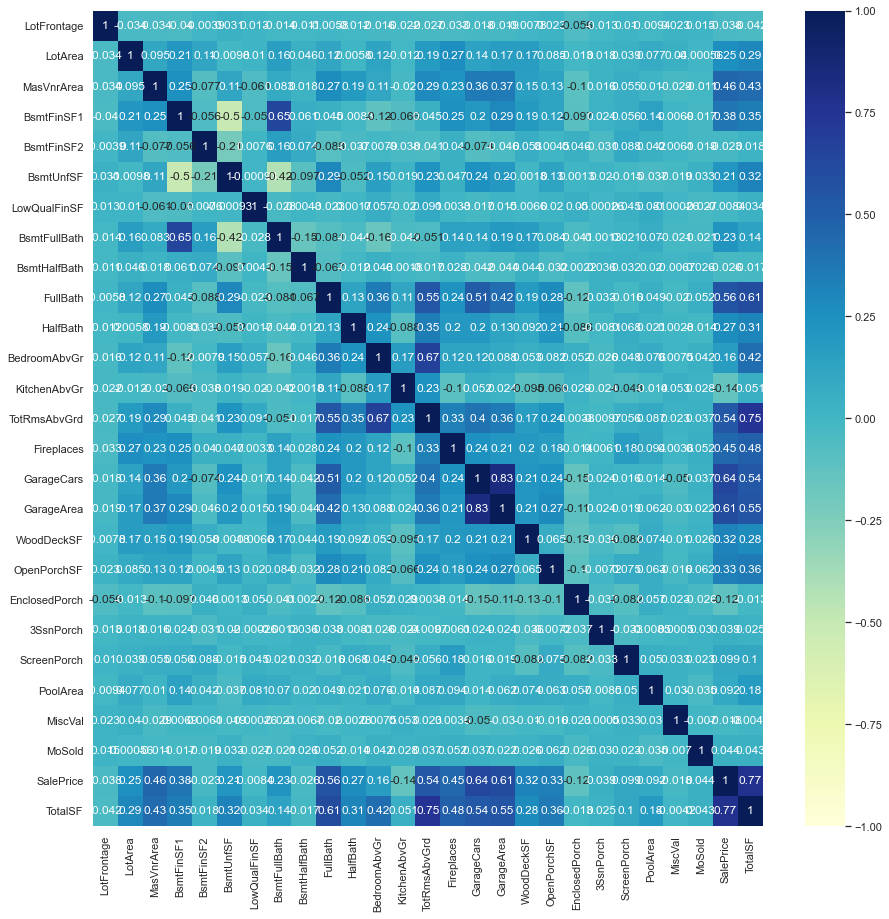

In [98]:
plt.rcParams['figure.figsize'] = (15, 15)
corr_data = df_house_numeric.corr()
sns.set(font_scale=1.0)
sns.heatmap(data=corr_data, cmap='YlGnBu', vmin=-1.0, vmax=1.0, annot=True)
plt.show()

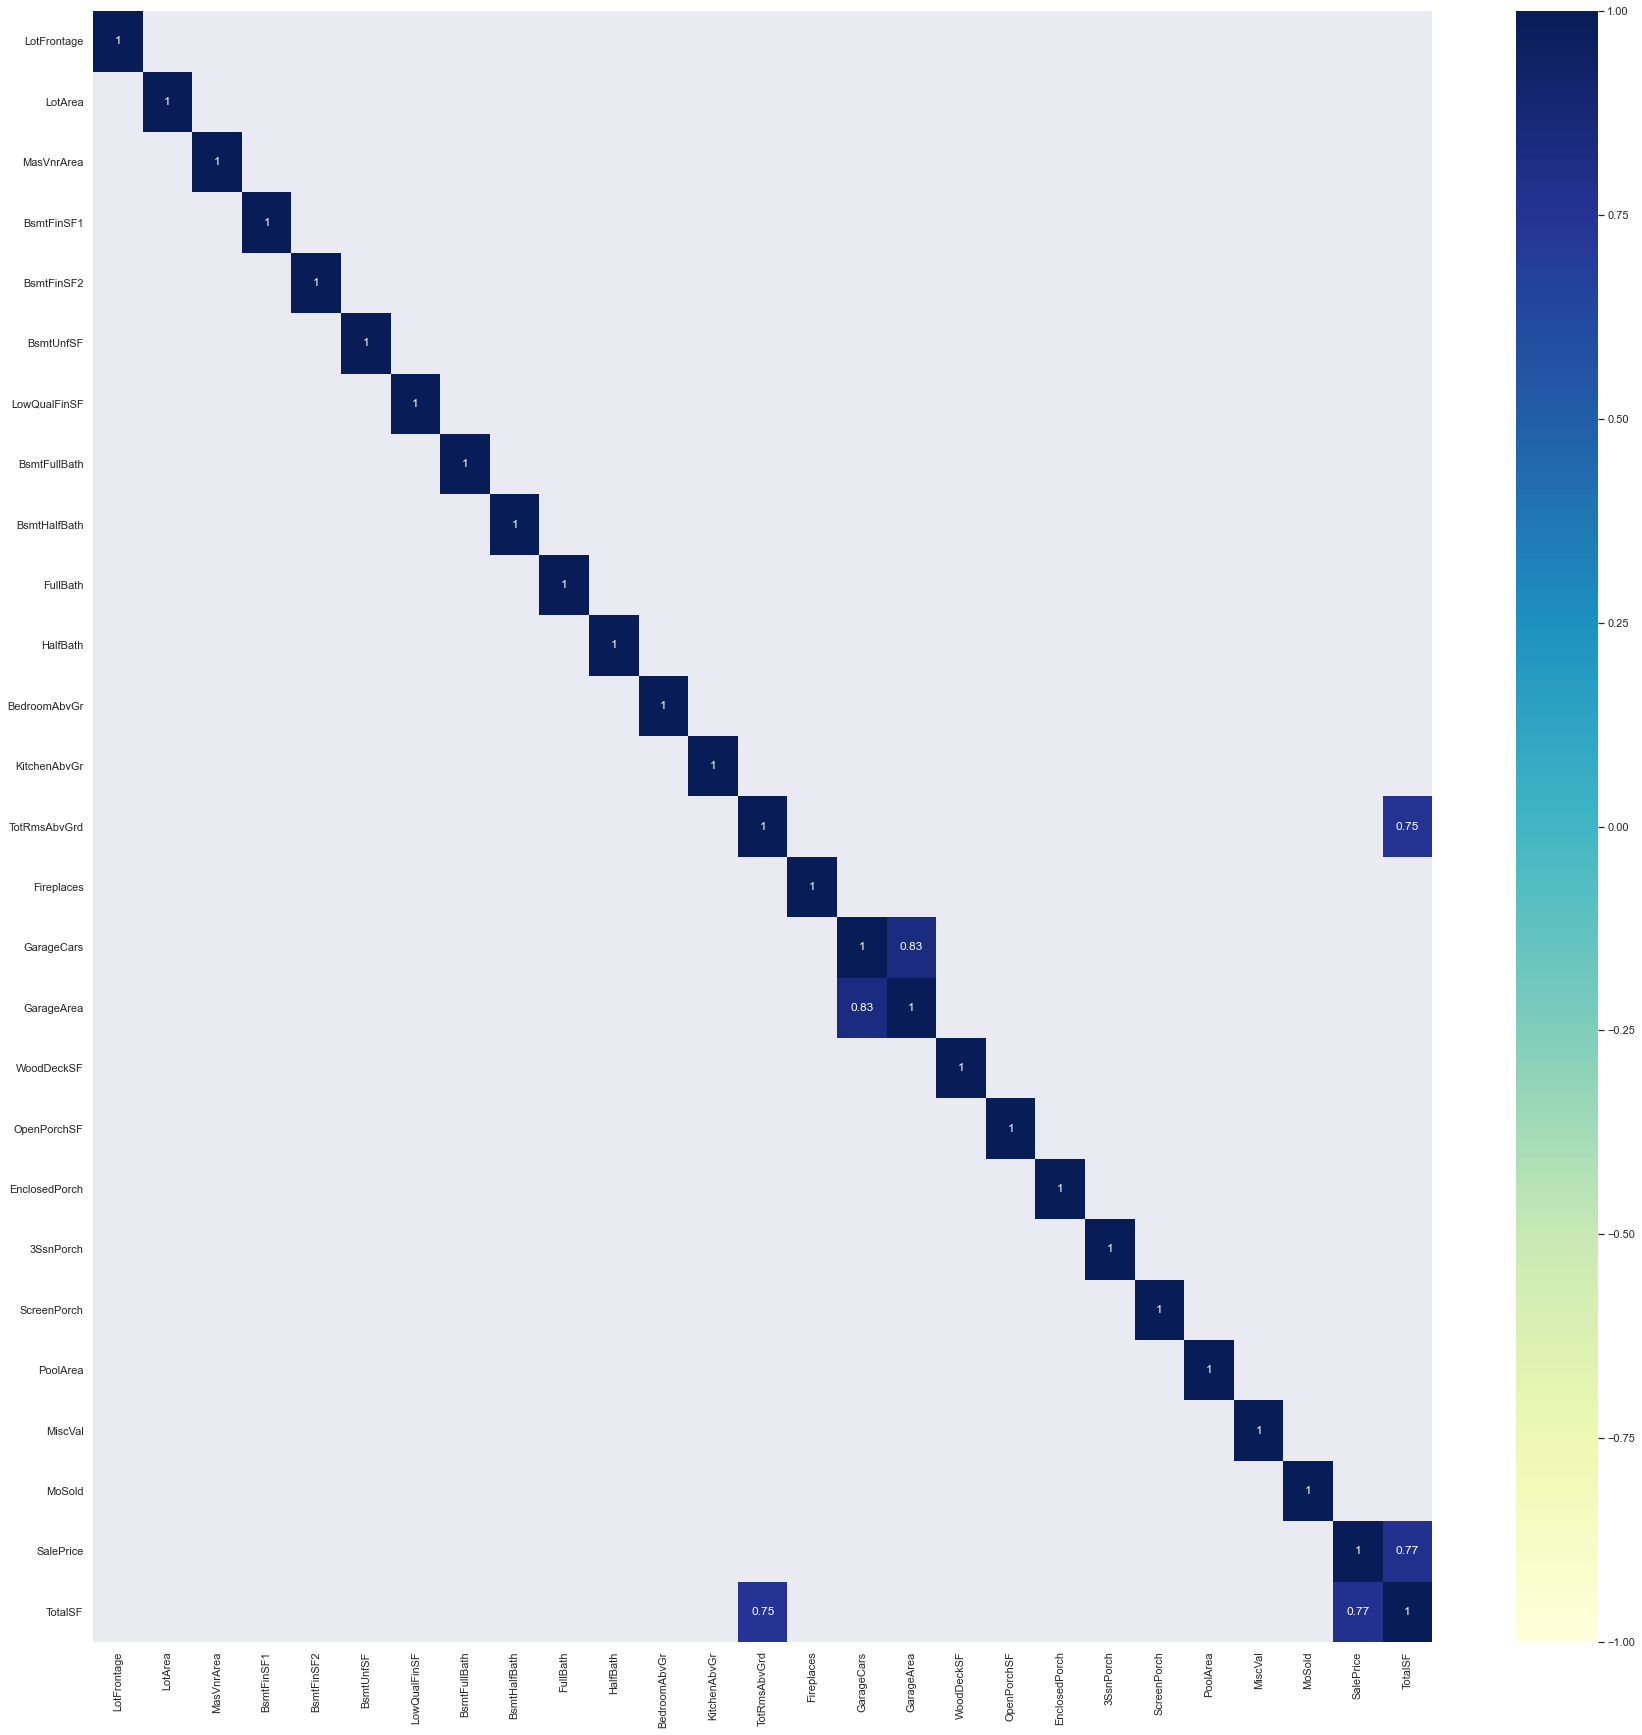

In [99]:
plt.rcParams['figure.figsize'] = (30, 30)
corr_data = df_house_numeric.corr()
sns.set(font_scale=1.0)
sns.heatmap(data=corr_data[ (corr_data<=-.7) | (corr_data>=.7)], cmap='YlGnBu', vmin=-1.0, vmax=1.0, annot=True)
plt.show()

### Forward Selection

In [100]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [101]:
Y = df_house_encoded[['log_SalePrice', 'SalePrice']]
X = df_house_encoded.drop(columns=['log_SalePrice', 'SalePrice'], axis=1)

In [102]:
X.shape

(1378, 541)

In [103]:
clf = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
y_train = Y_train['log_SalePrice']

# Build Sequential Feature Selector model
model_sfs = sfs(clf, k_features=541, forward=True, floating=False, scoring='r2', verbose=2, cv=5)

model_sfs = model_sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 541 out of 541 | elapsed:    2.9s finished

[2021-09-04 03:50:37] Features: 1/541 -- score: 0.5421540614494205[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.9s finished

[2021-09-04 03:50:40] Features: 2/541 -- score: 0.6380924723298198[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 539 out of 539 | elapsed:    3.1s finished

[2021-09-04 03:50:43] Features: 3/541 -- score: 0.6760543657580829[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done 514 out of 514 | elapsed:    3.9s finished

[2021-09-04 03:52:12] Features: 28/541 -- score: 0.8428139111245677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 513 out of 513 | elapsed:    3.9s finished

[2021-09-04 03:52:16] Features: 29/541 -- score: 0.8444562154804807[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    4.0s finished

[2021-09-04 03:52:21] Features: 30/541 -- score: 0.8478330792215452[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 511 out of 511 | elapsed:    3.9s finished

[2021-09-04 03:52:25] Features: 

[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:    4.9s finished

[2021-09-04 03:54:19] Features: 56/541 -- score: 0.8748643277935553[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 485 out of 485 | elapsed:    5.1s finished

[2021-09-04 03:54:24] Features: 57/541 -- score: 0.8752155700368484[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 484 out of 484 | elapsed:    5.2s finished

[2021-09-04 03:54:30] Features: 58/541 -- score: 0.8755307655744315[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    5.1s finished

[2021-09-04 03:54:35] Features: 

[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed:    6.5s finished

[2021-09-04 03:57:04] Features: 84/541 -- score: 0.8837722144168669[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 457 out of 457 | elapsed:    6.6s finished

[2021-09-04 03:57:10] Features: 85/541 -- score: 0.8840711066432899[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    6.5s finished

[2021-09-04 03:57:17] Features: 86/541 -- score: 0.8843379875703283[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    6.6s finished

[2021-09-04 03:57:24] Features: 

[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    9.0s finished

[2021-09-04 04:00:40] Features: 112/541 -- score: 0.8885998754929314[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 429 out of 429 | elapsed:    8.1s finished

[2021-09-04 04:00:48] Features: 113/541 -- score: 0.8886656759695979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 428 out of 428 | elapsed:    8.1s finished

[2021-09-04 04:00:56] Features: 114/541 -- score: 0.8887265337534951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 427 out of 427 | elapsed:    8.1s finished

[2021-09-04 04:01:04] Feature

[Parallel(n_jobs=1)]: Done 402 out of 402 | elapsed:   10.9s finished

[2021-09-04 04:04:56] Features: 140/541 -- score: 0.8900613241745564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed:   10.7s finished

[2021-09-04 04:05:07] Features: 141/541 -- score: 0.8900869328559302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.8s finished

[2021-09-04 04:05:17] Features: 142/541 -- score: 0.8900965714960096[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 399 out of 399 | elapsed:    9.9s finished

[2021-09-04 04:05:27] Feature

[Parallel(n_jobs=1)]: Done 374 out of 374 | elapsed:    9.1s finished

[2021-09-04 04:09:20] Features: 168/541 -- score: 0.8902049666750915[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 373 out of 373 | elapsed:   11.0s finished

[2021-09-04 04:09:31] Features: 169/541 -- score: 0.8902032114345948[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 372 out of 372 | elapsed:   10.7s finished

[2021-09-04 04:09:42] Features: 170/541 -- score: 0.8902035789410039[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 371 out of 371 | elapsed:   10.7s finished

[2021-09-04 04:09:52] Feature

[Parallel(n_jobs=1)]: Done 346 out of 346 | elapsed:   12.3s finished

[2021-09-04 04:14:49] Features: 196/541 -- score: 0.8901528039326129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 345 out of 345 | elapsed:   12.3s finished

[2021-09-04 04:15:01] Features: 197/541 -- score: 0.8901442278286924[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 344 out of 344 | elapsed:   12.2s finished

[2021-09-04 04:15:13] Features: 198/541 -- score: 0.8901187518667207[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 343 out of 343 | elapsed:   12.4s finished

[2021-09-04 04:15:26] Feature

[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed:   13.6s finished

[2021-09-04 04:20:54] Features: 224/541 -- score: 0.8893596209415593[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 317 out of 317 | elapsed:   13.7s finished

[2021-09-04 04:21:08] Features: 225/541 -- score: 0.8893067355654726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 316 out of 316 | elapsed:   13.7s finished

[2021-09-04 04:21:22] Features: 226/541 -- score: 0.8892674464652408[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   13.6s finished

[2021-09-04 04:21:36] Feature

[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed:   14.7s finished

[2021-09-04 04:27:34] Features: 252/541 -- score: 0.8876390547115312[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 289 out of 289 | elapsed:   15.1s finished

[2021-09-04 04:27:50] Features: 253/541 -- score: 0.8875305949205006[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:   14.6s finished

[2021-09-04 04:28:04] Features: 254/541 -- score: 0.88741449539396[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 287 out of 287 | elapsed:   14.7s finished

[2021-09-04 04:28:19] Features:

[Parallel(n_jobs=1)]: Done 262 out of 262 | elapsed:   15.5s finished

[2021-09-04 04:34:40] Features: 280/541 -- score: 0.8845235737563975[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 261 out of 261 | elapsed:   15.3s finished

[2021-09-04 04:34:55] Features: 281/541 -- score: 0.88436720132985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:   15.0s finished

[2021-09-04 04:35:10] Features: 282/541 -- score: 0.8841975500732102[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 259 out of 259 | elapsed:   15.1s finished

[2021-09-04 04:35:26] Features: